## Imports

In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib import colormaps as mcm 

## Setup


In [2]:
df_indexed = pd.read_csv("Battery_RUL.csv", index_col="Cycle_Index")
df_indexed.index = df_indexed.index.astype(int)
df = pd.read_csv("Battery_RUL.csv", index_col=False)

np.random.seed(0)

def split_df_per_battery(df):
    indices = df.index[df['RUL'] == 0].tolist()
    indices = [i + 1 for i in indices]
    indices = [0, *indices]
    dfs = []
    for i, i_next in zip(indices, indices[1:]):
        bat_df = df.iloc[i:i_next].copy()
        bat_df.index = bat_df["Cycle_Index"]
        bat_df.drop("Cycle_Index", axis=1, inplace=True)
        cmap = mcm.get_cmap('hsv')
        bat_df["color"] = [cmap(i / len(bat_df)) for i in range(len(bat_df))]
        dfs.append(bat_df)
    return dfs

dfs = split_df_per_battery(df)
features_to_plot = [col for col in df.columns.to_list() if col not in ["RUL", "color", "Cycle_Index"]]

## Plot features against target

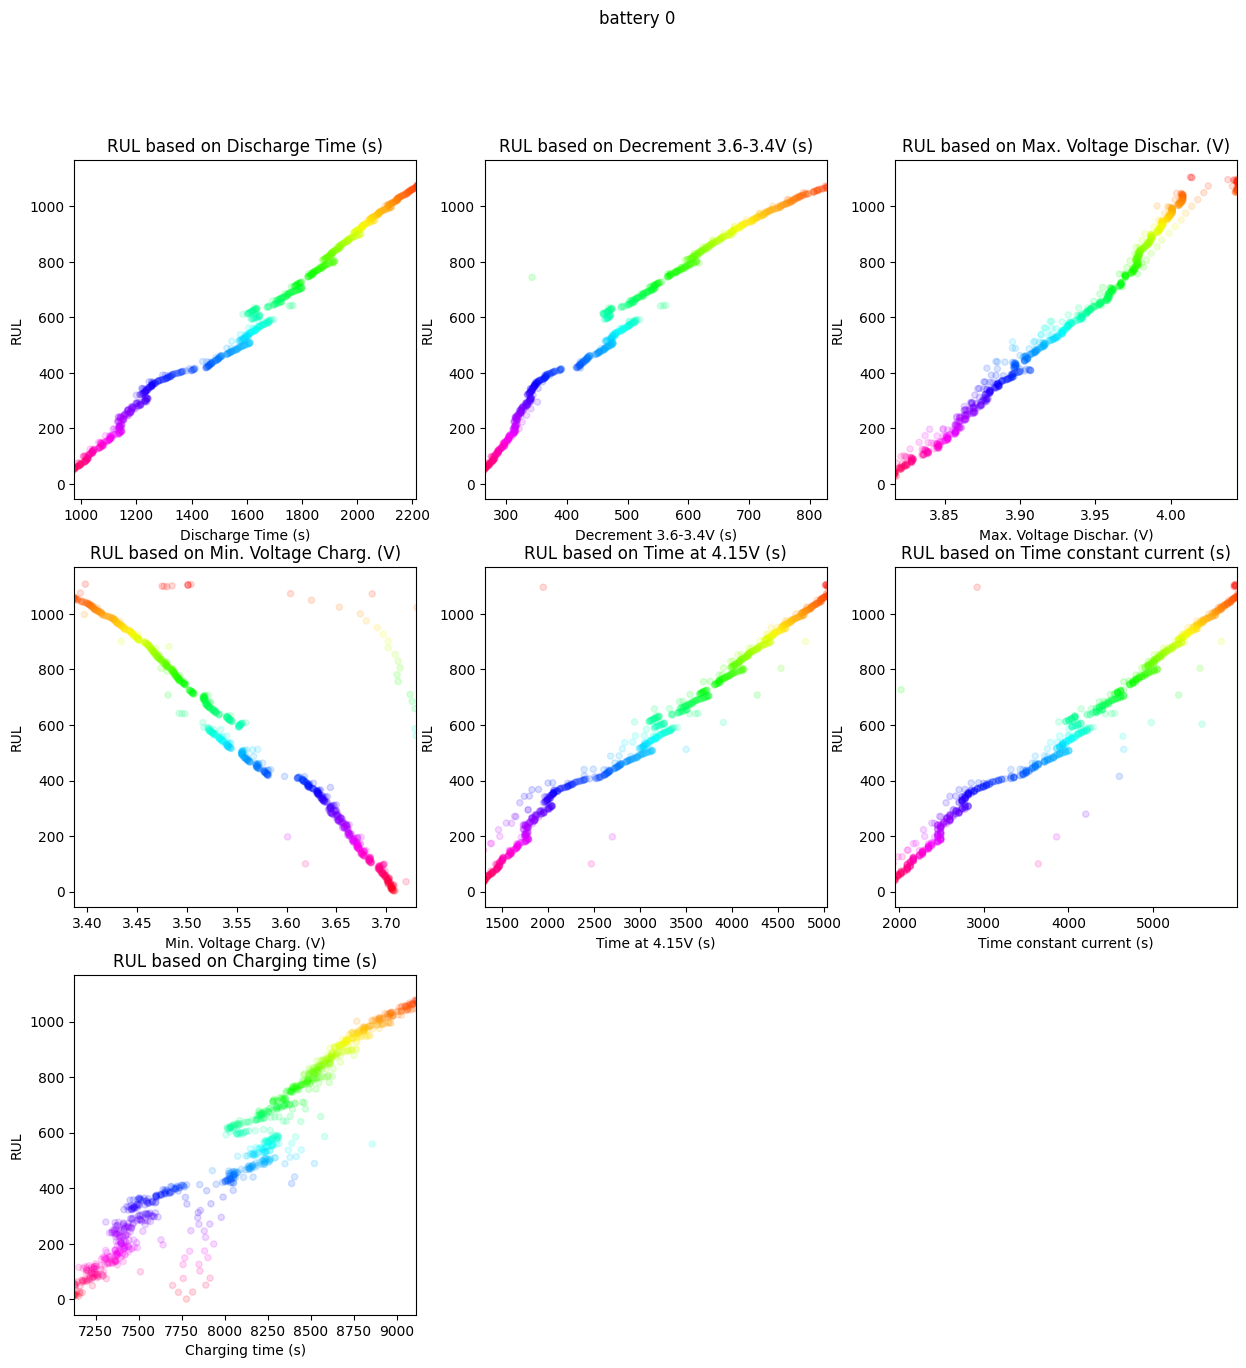

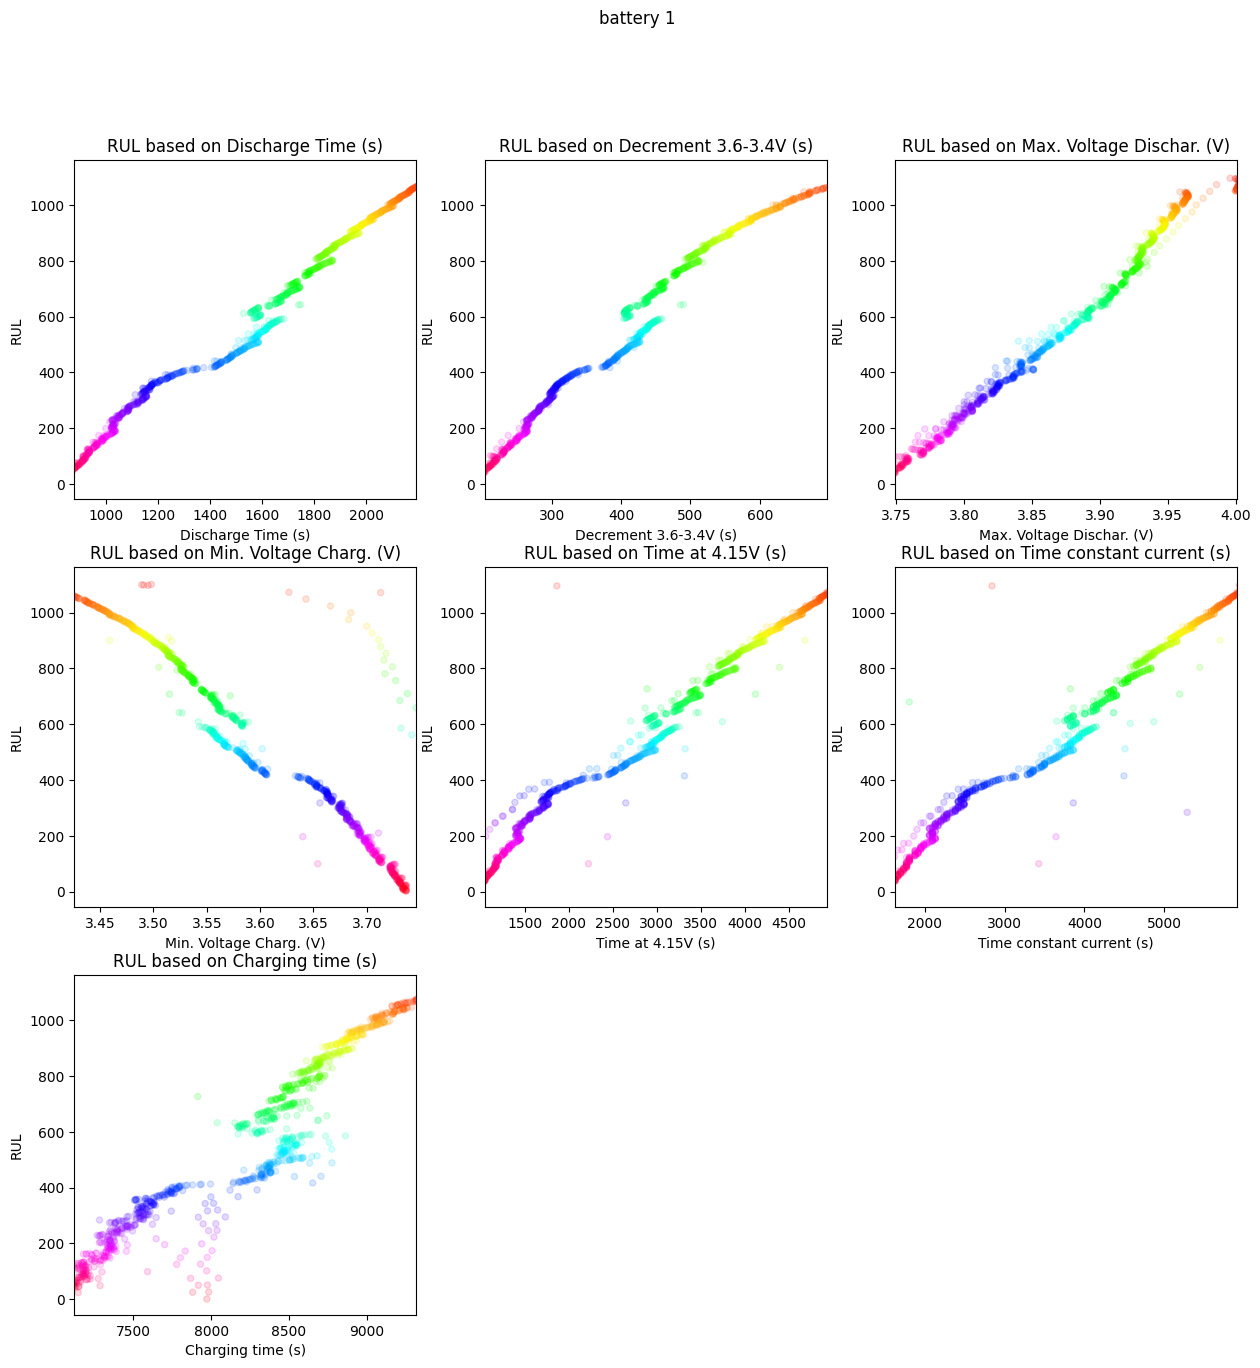

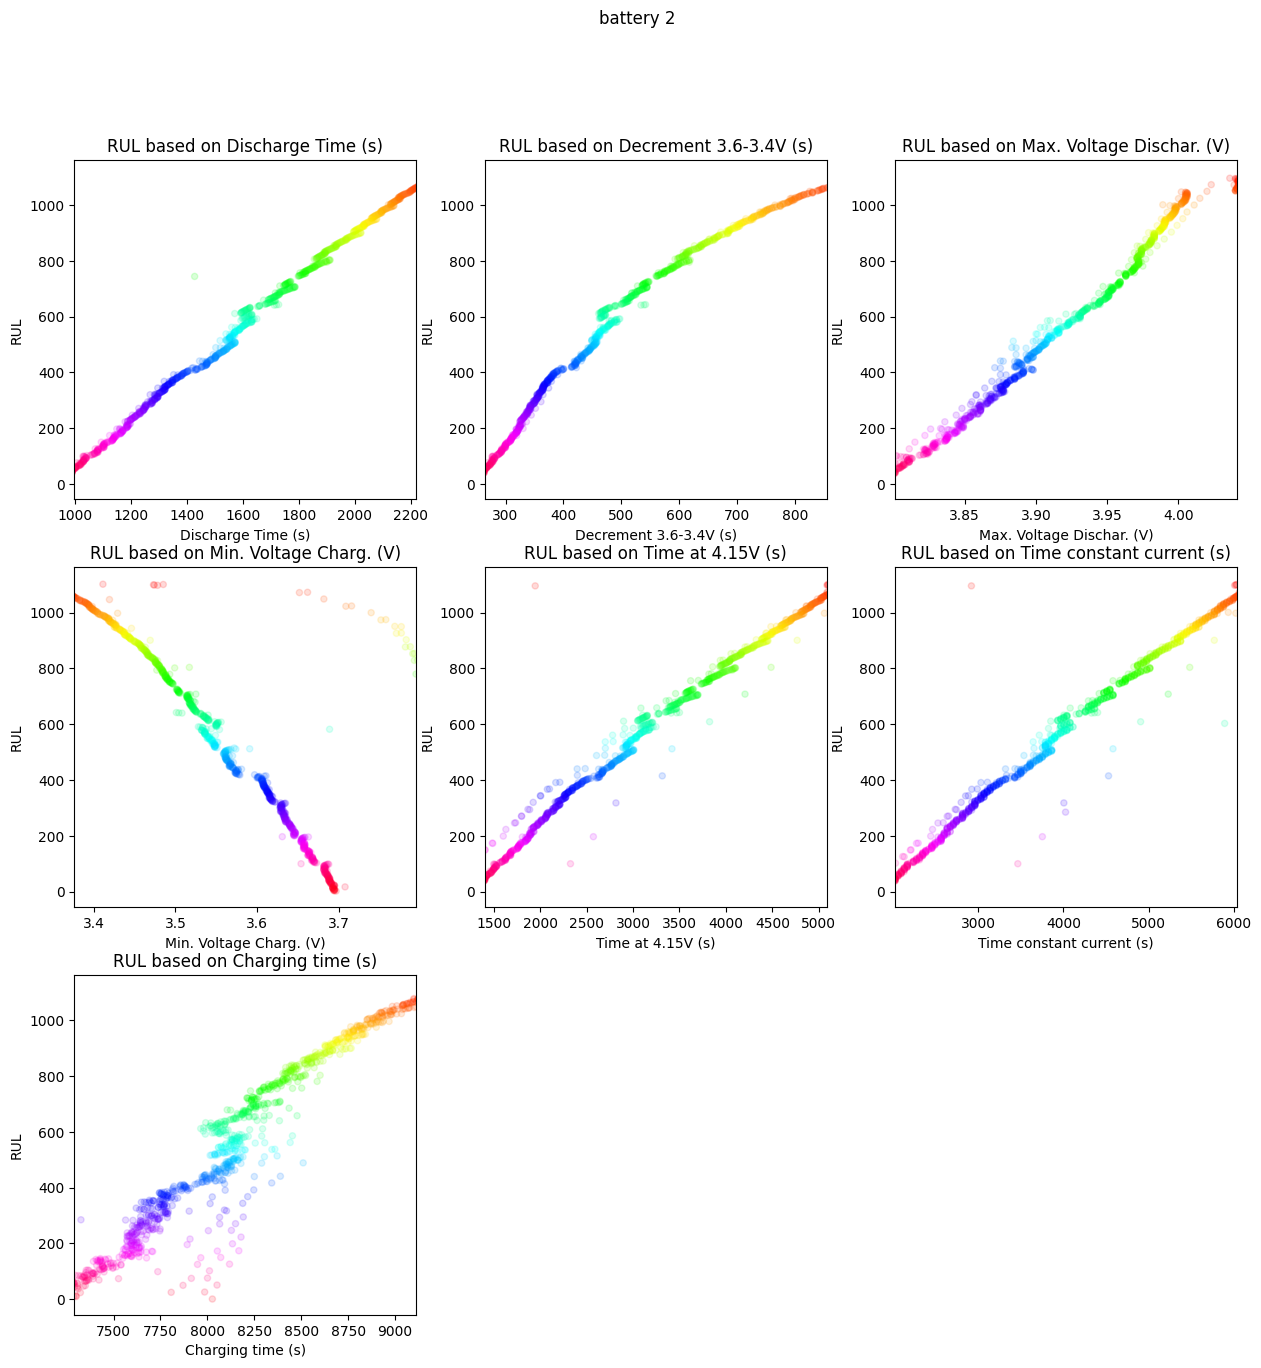

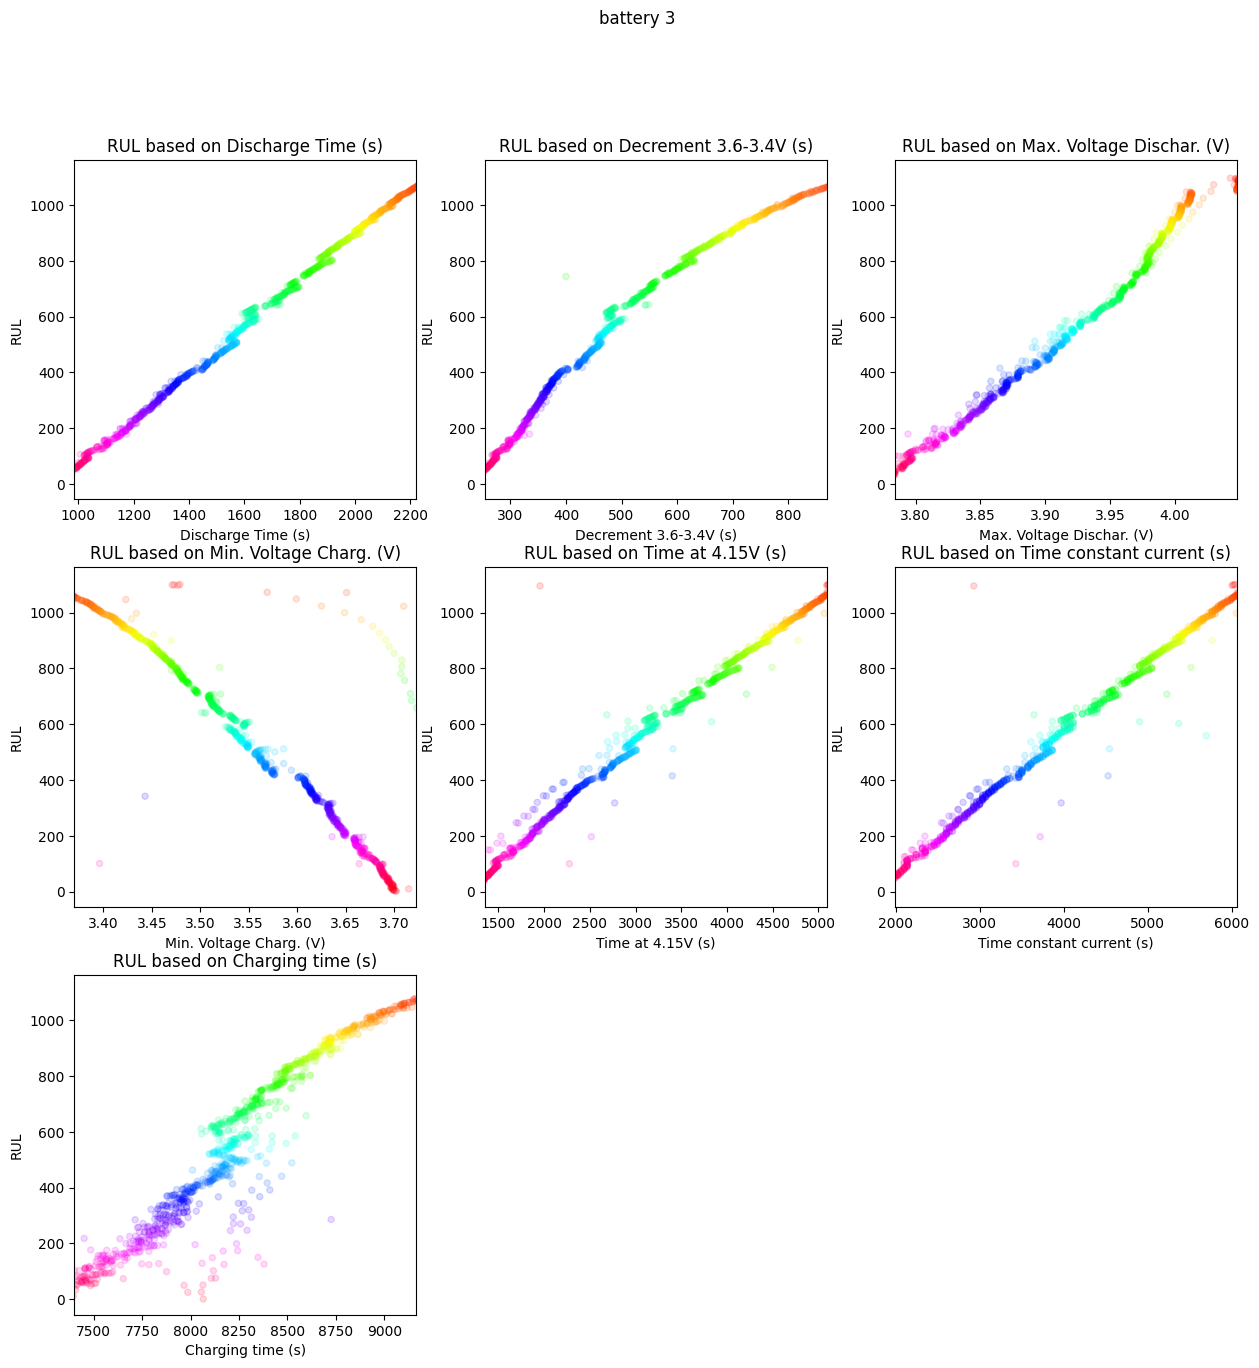

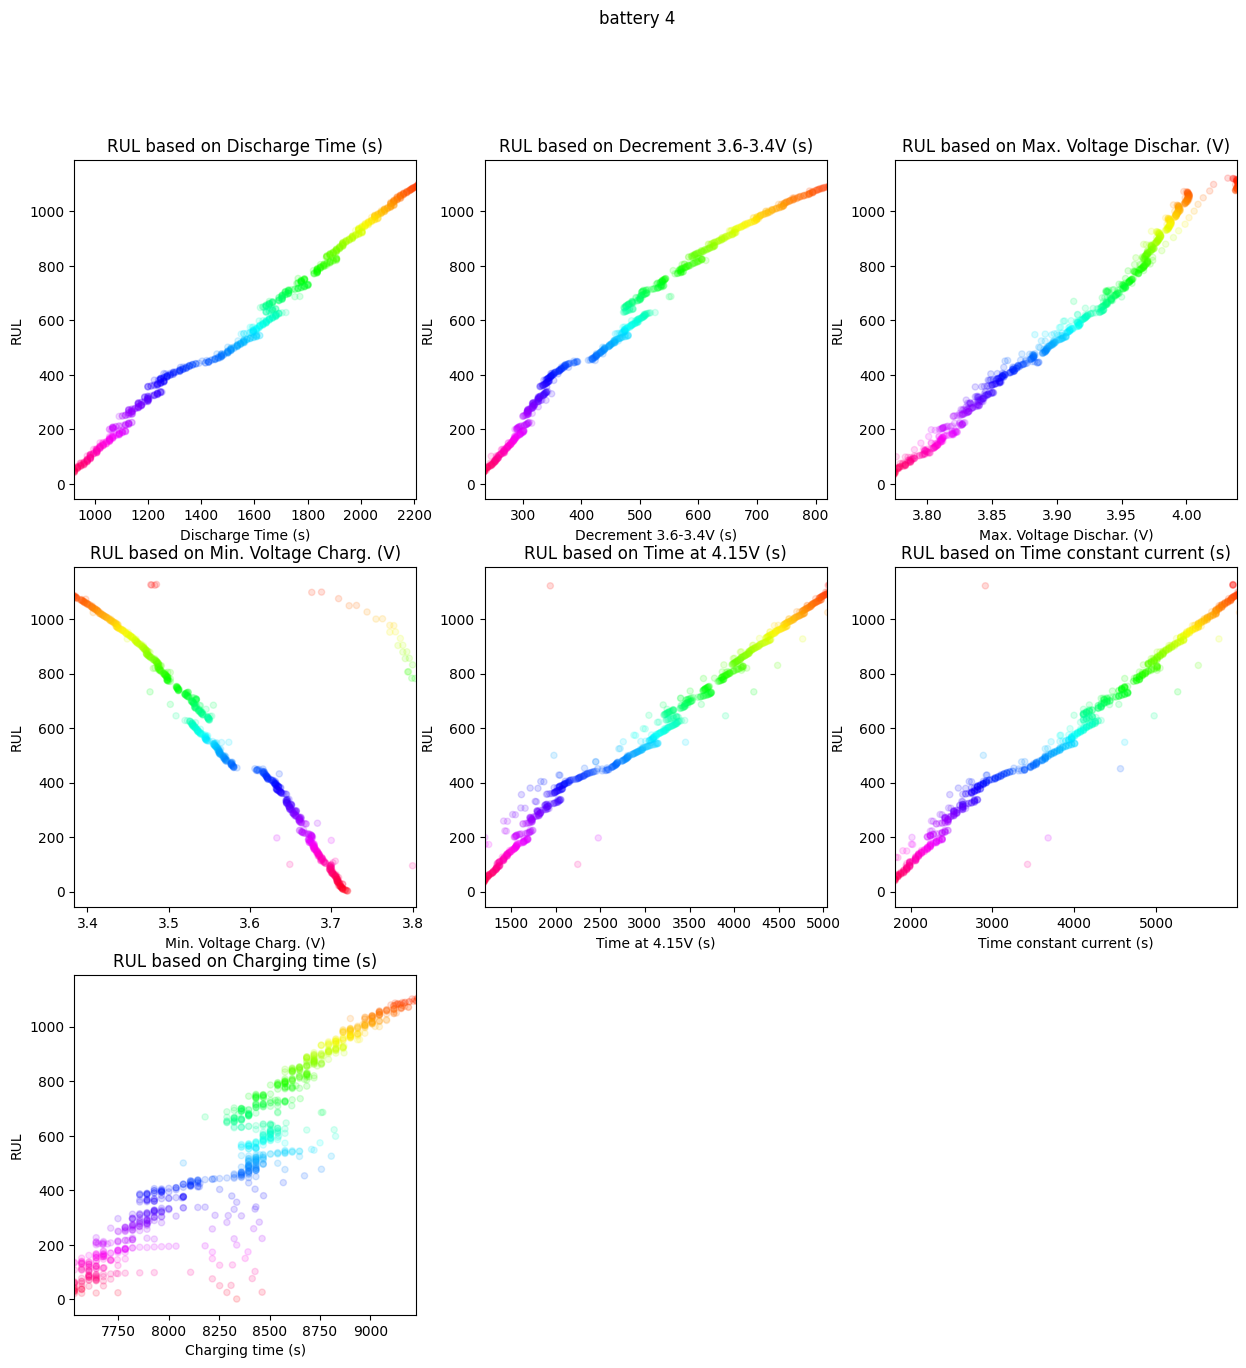

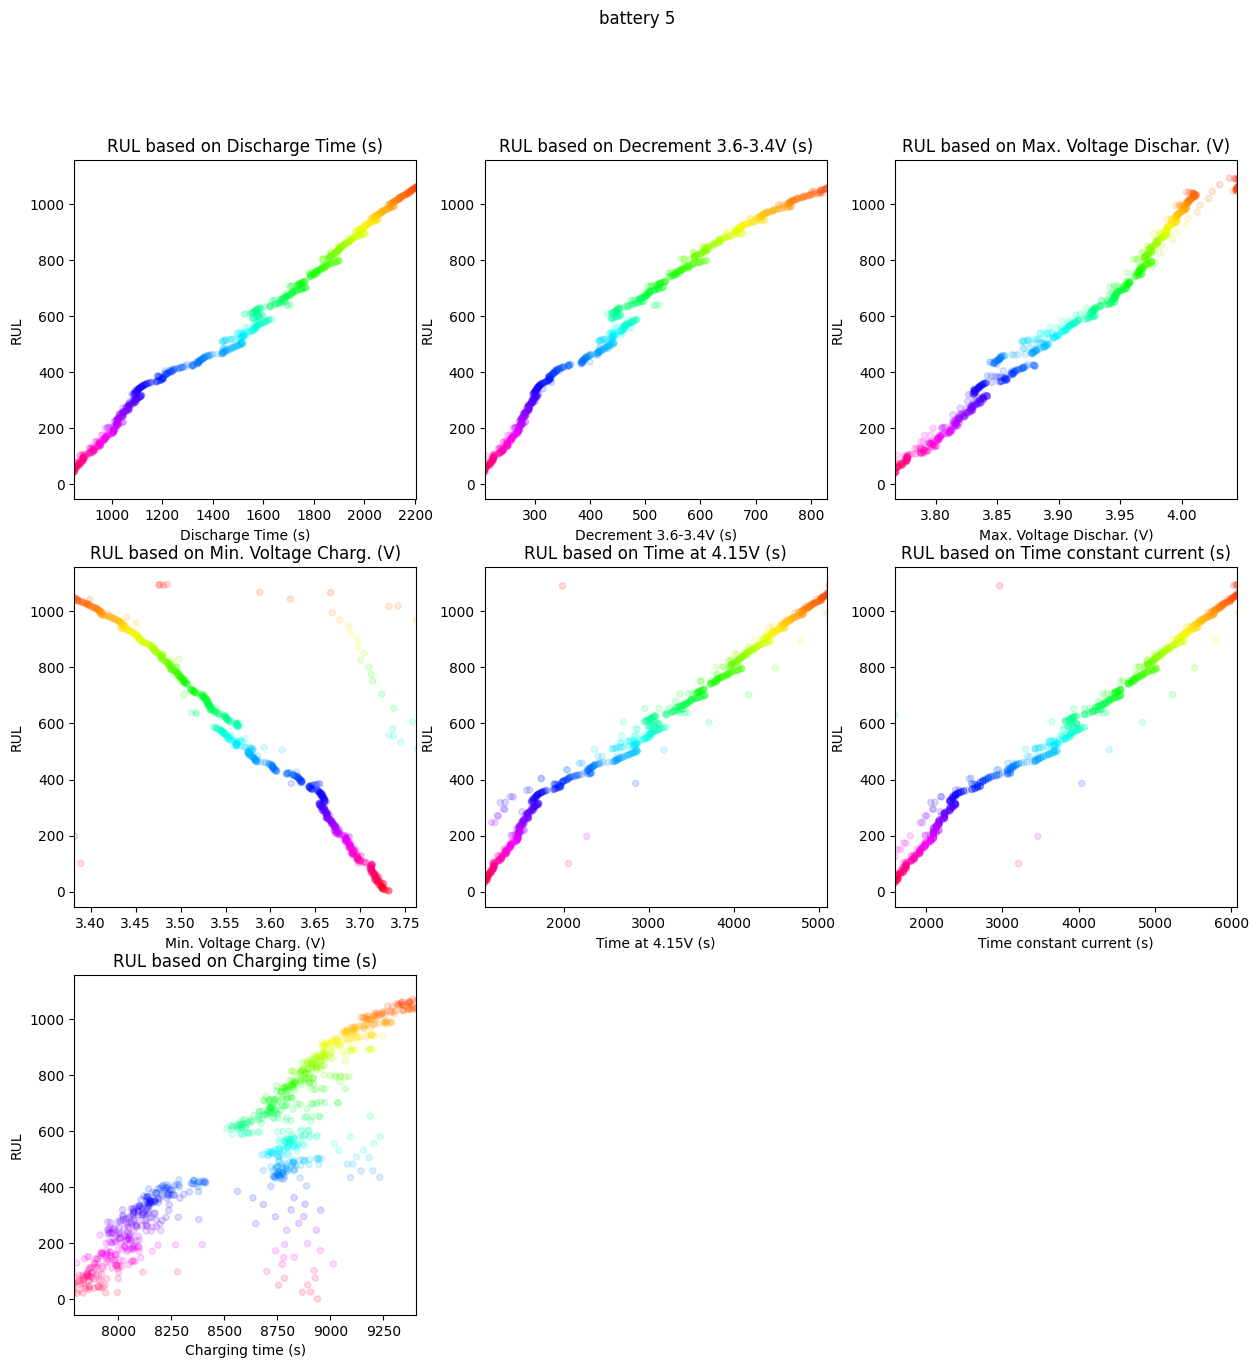

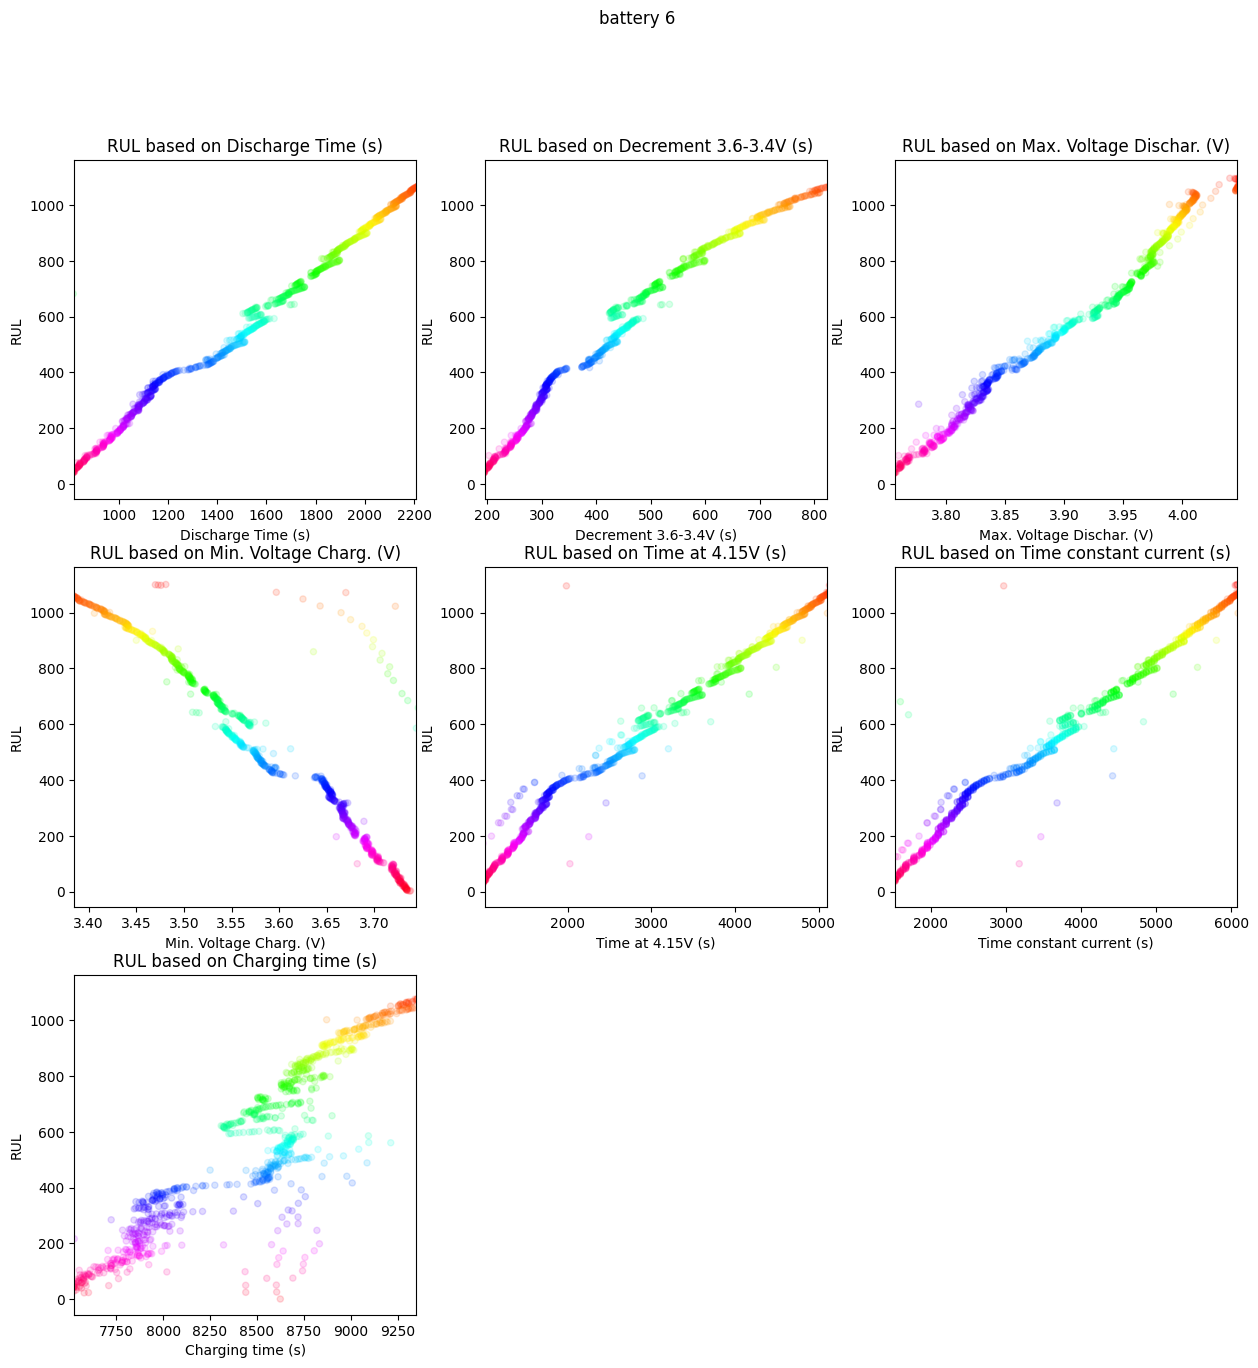

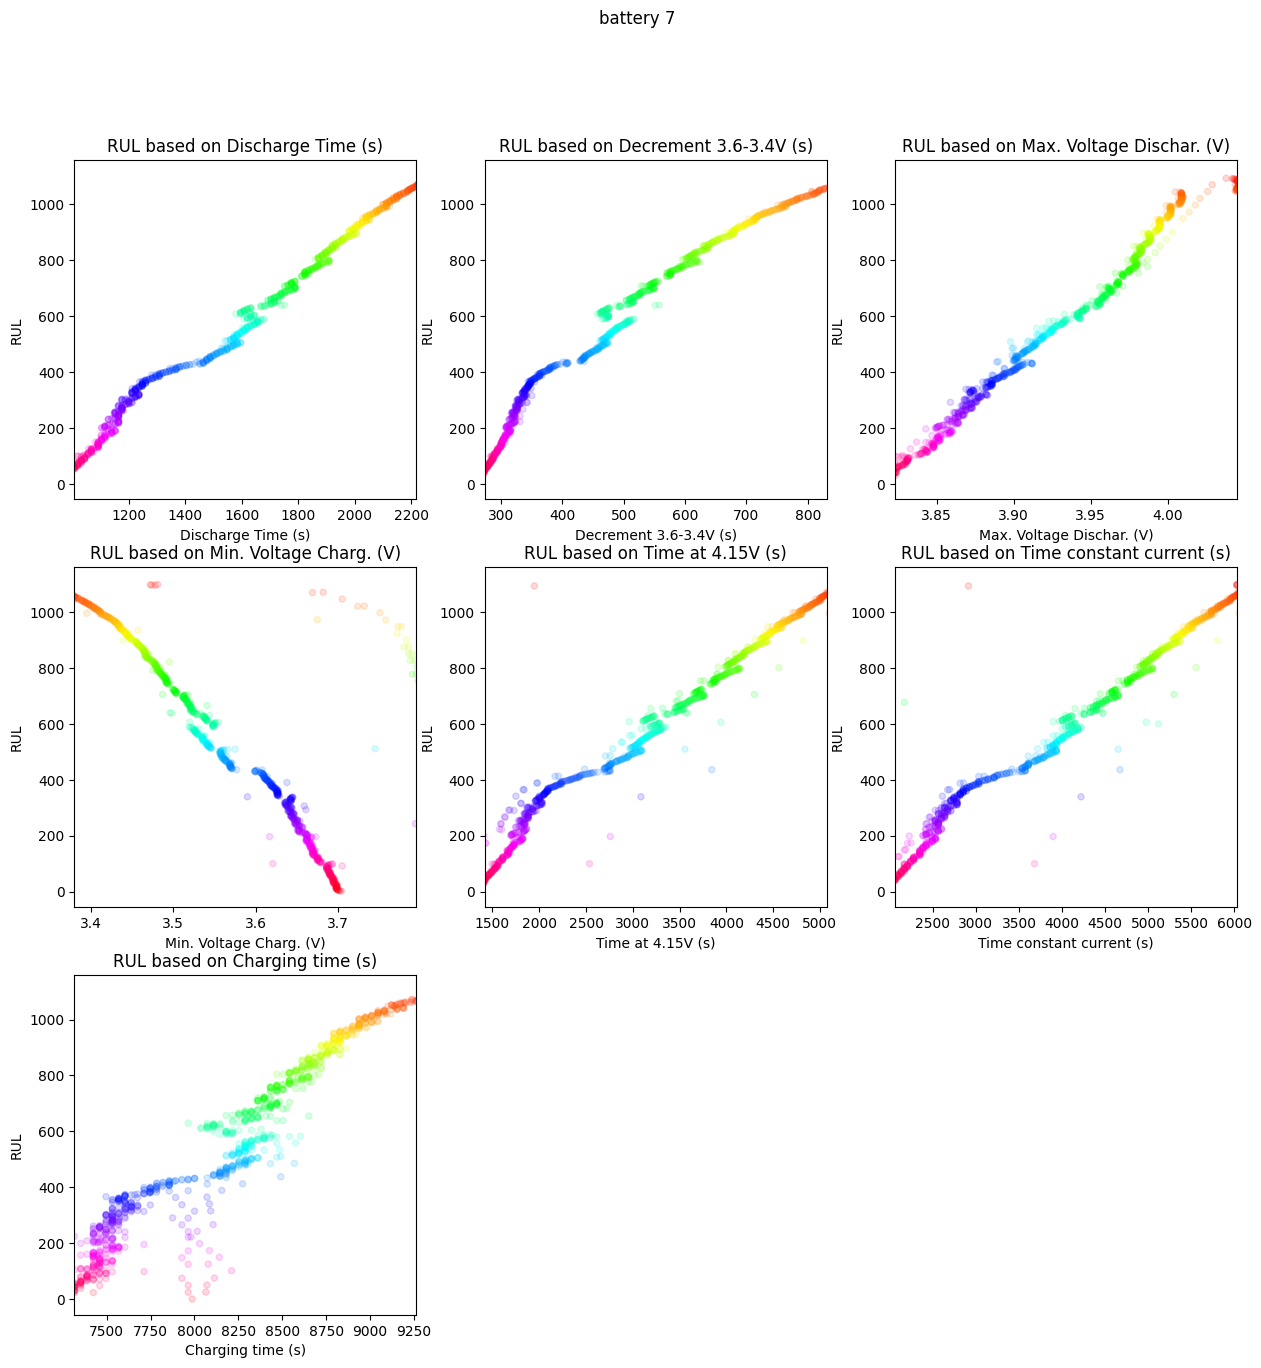

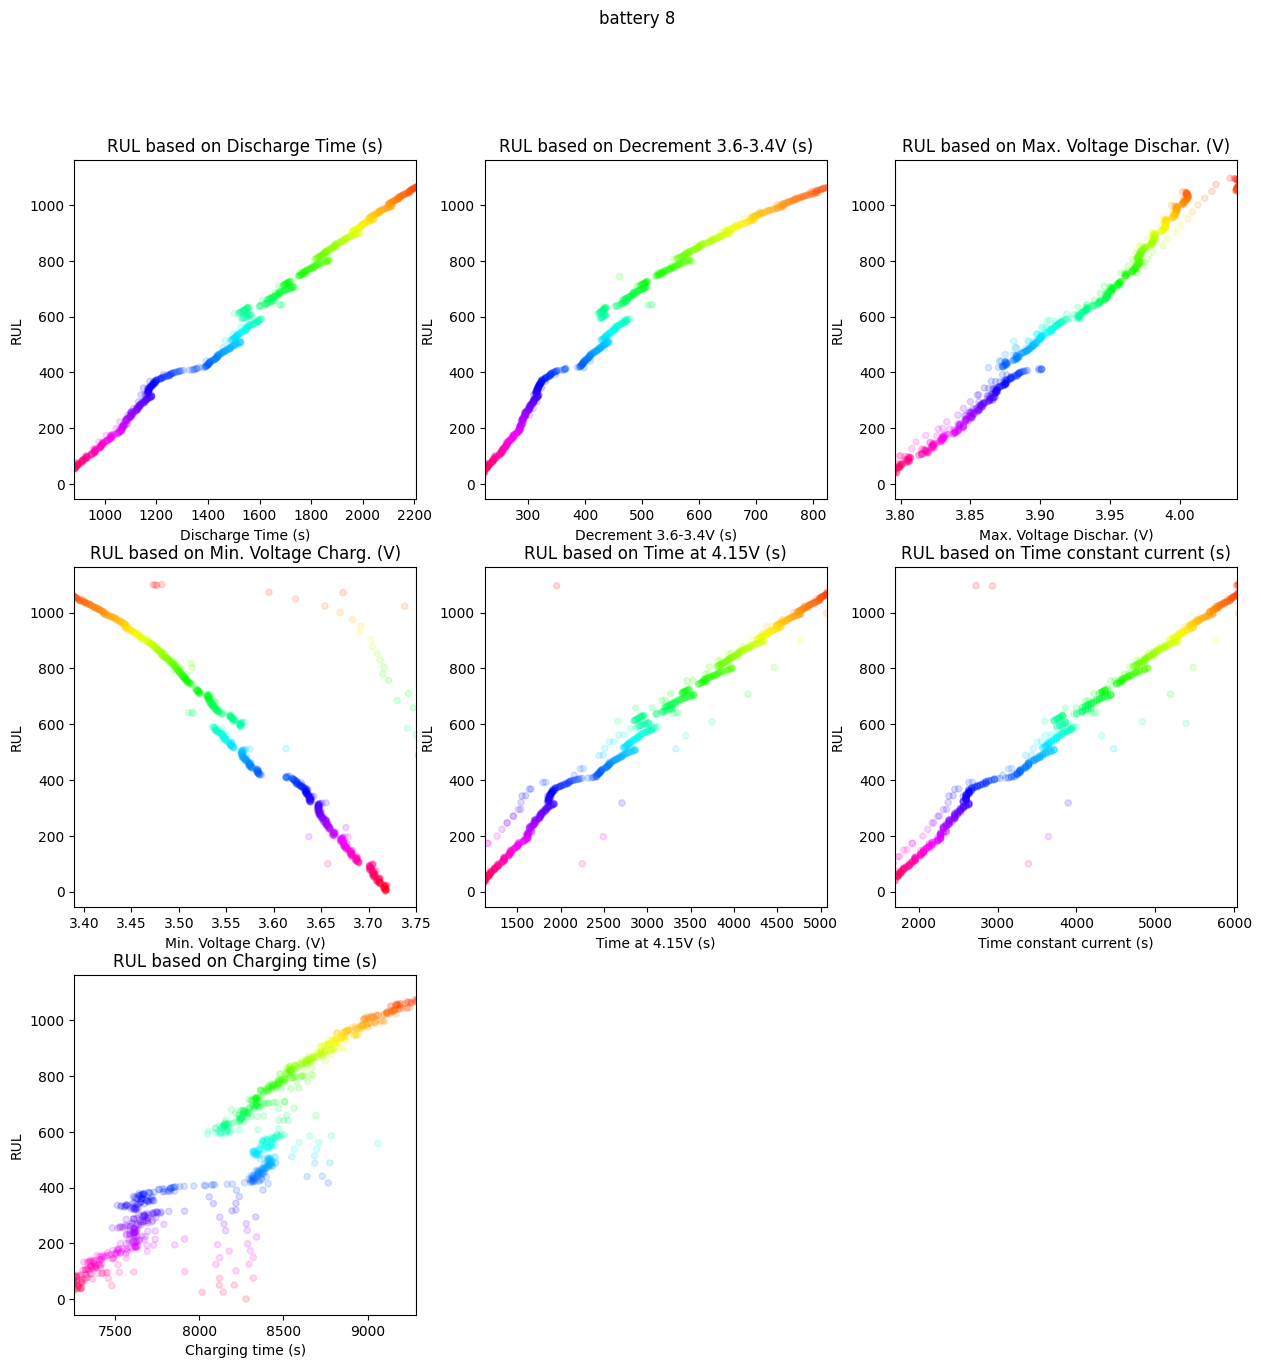

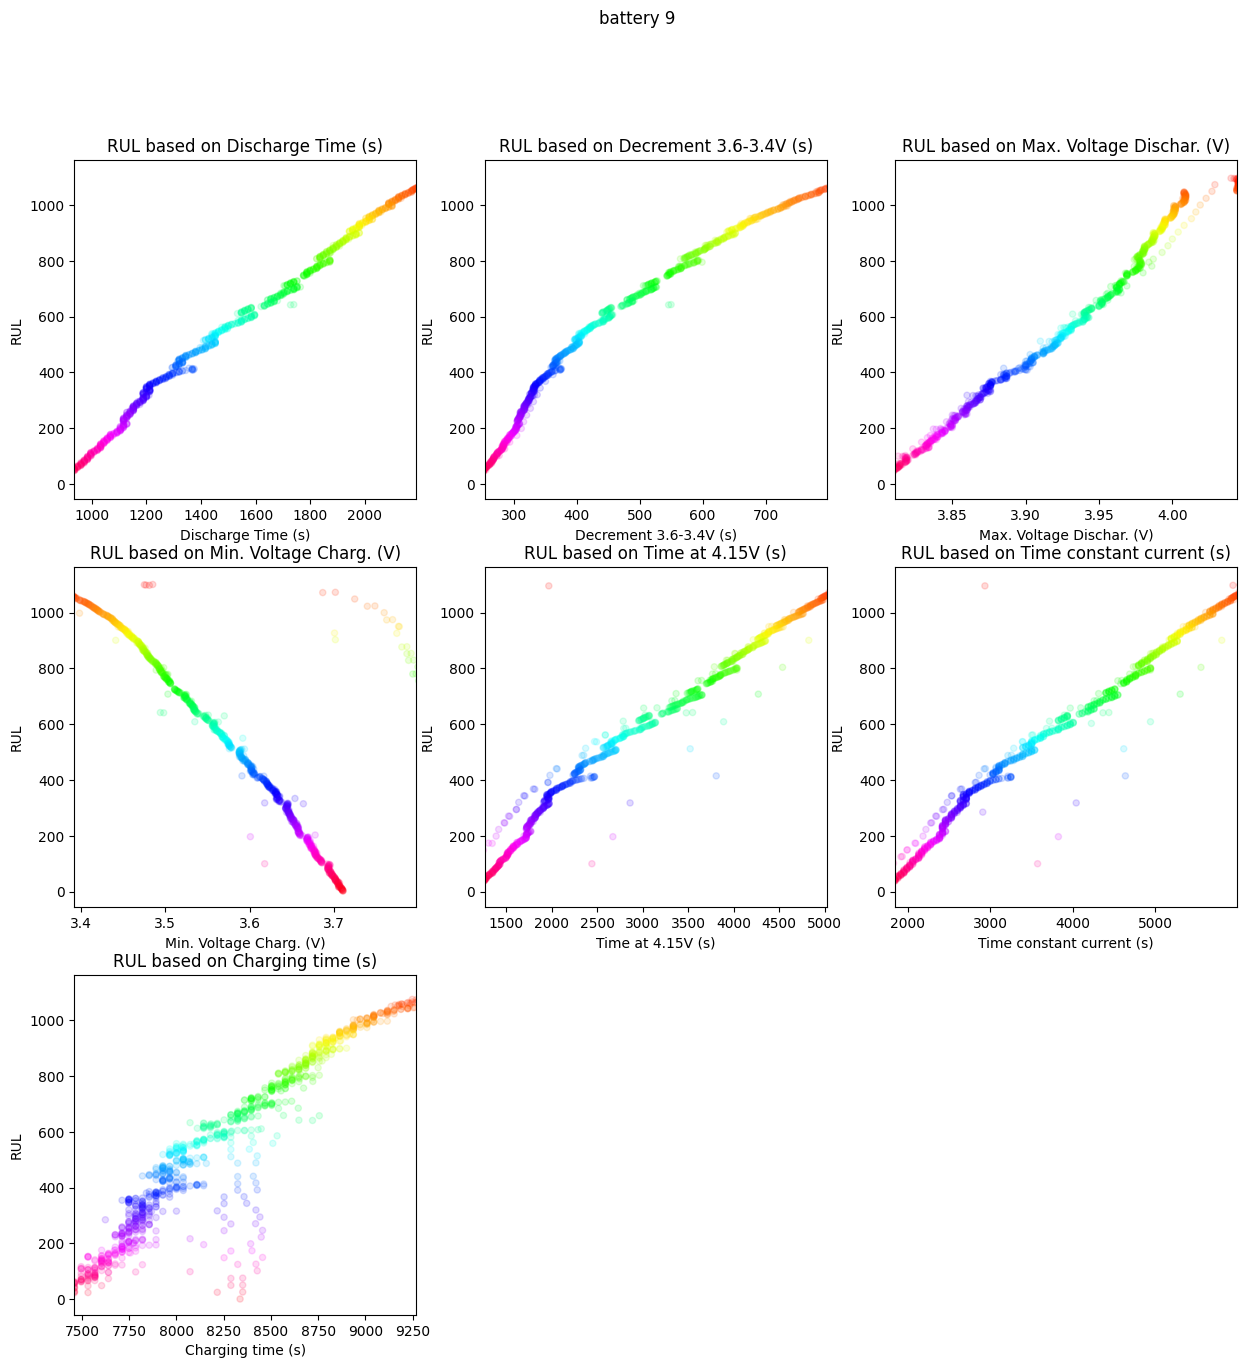

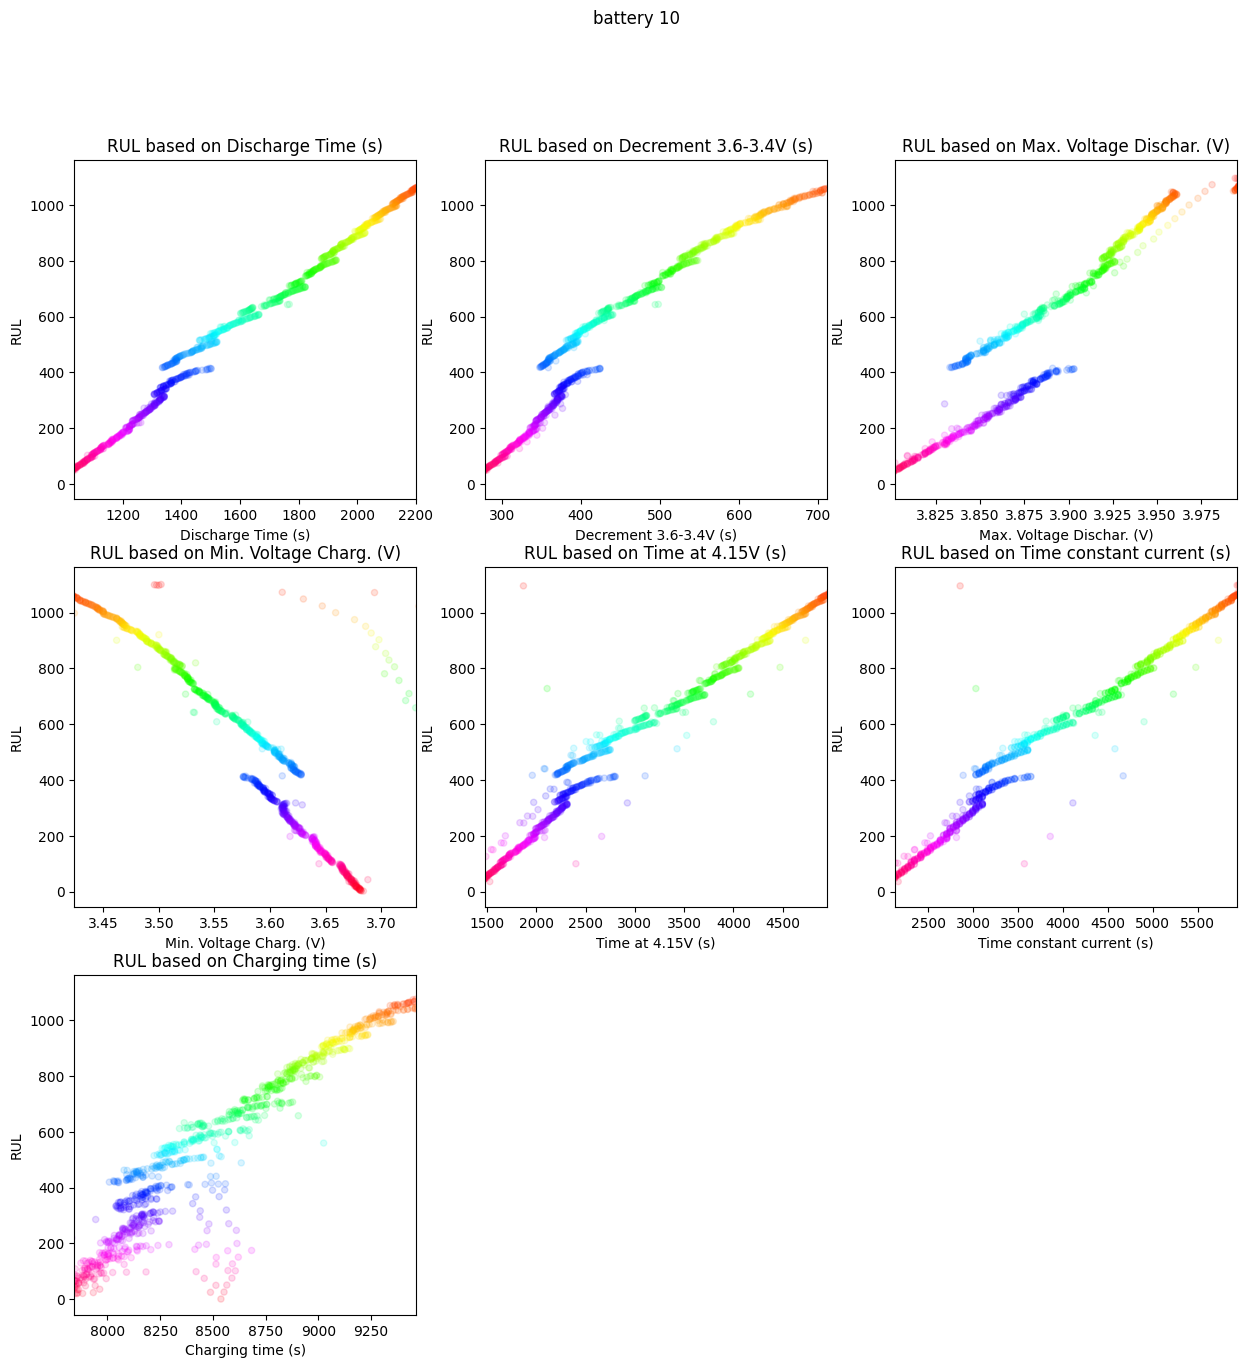

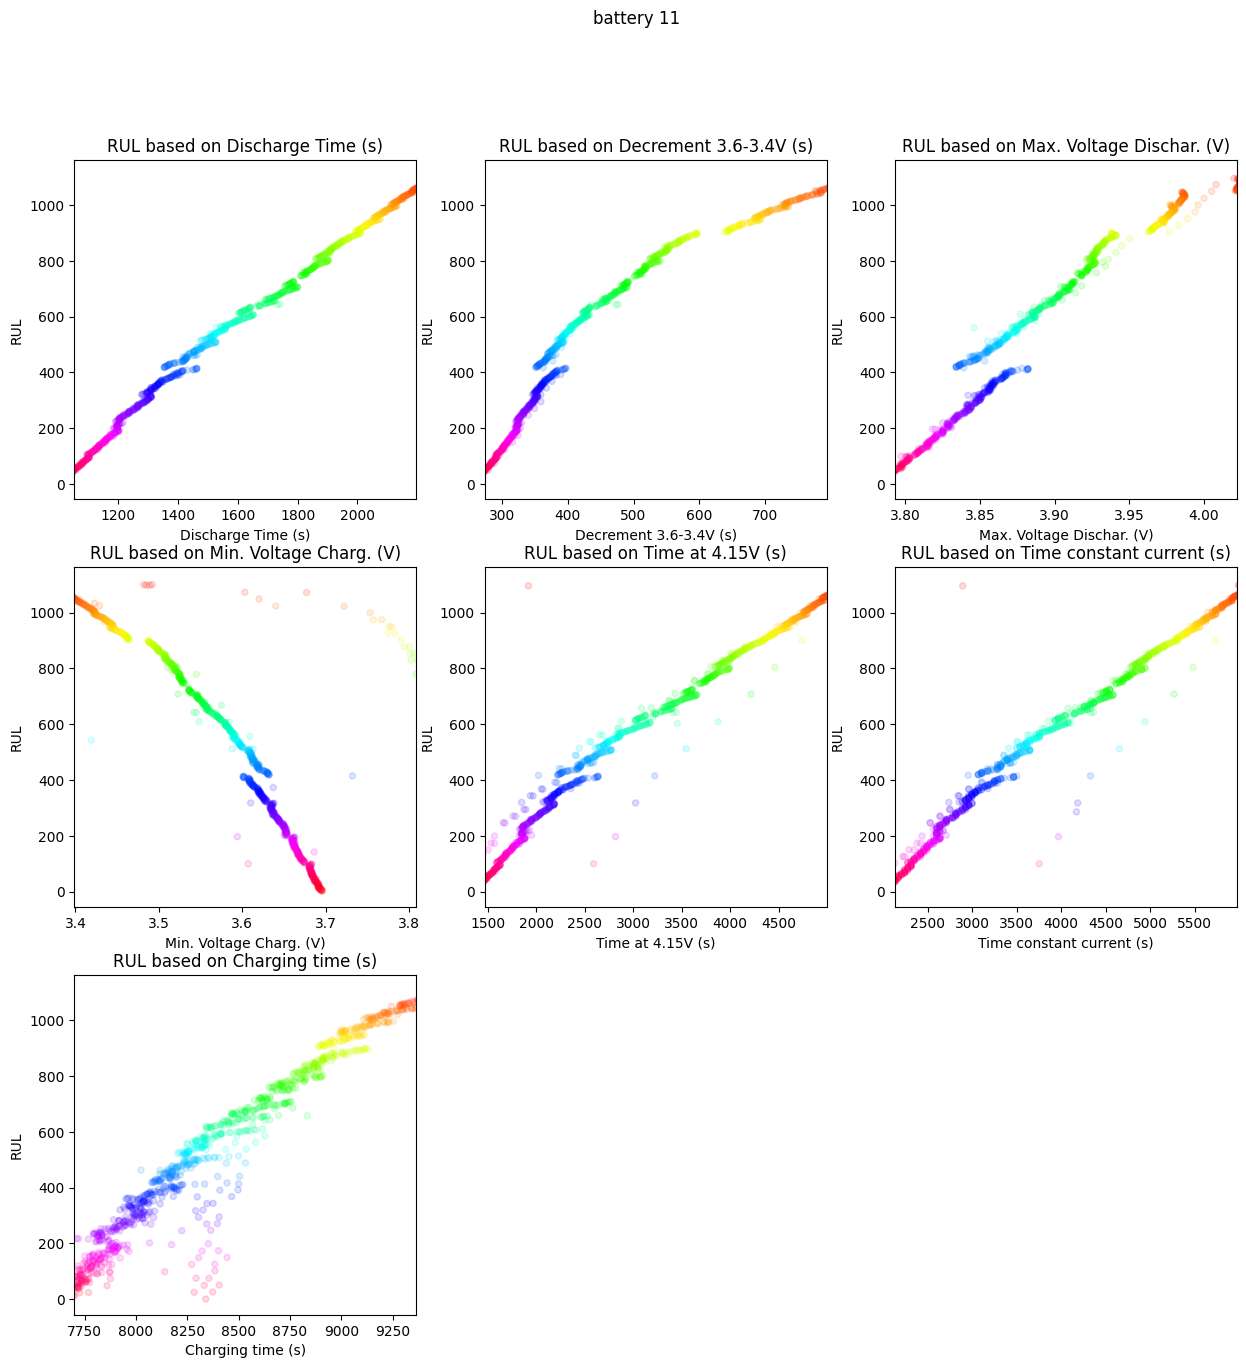

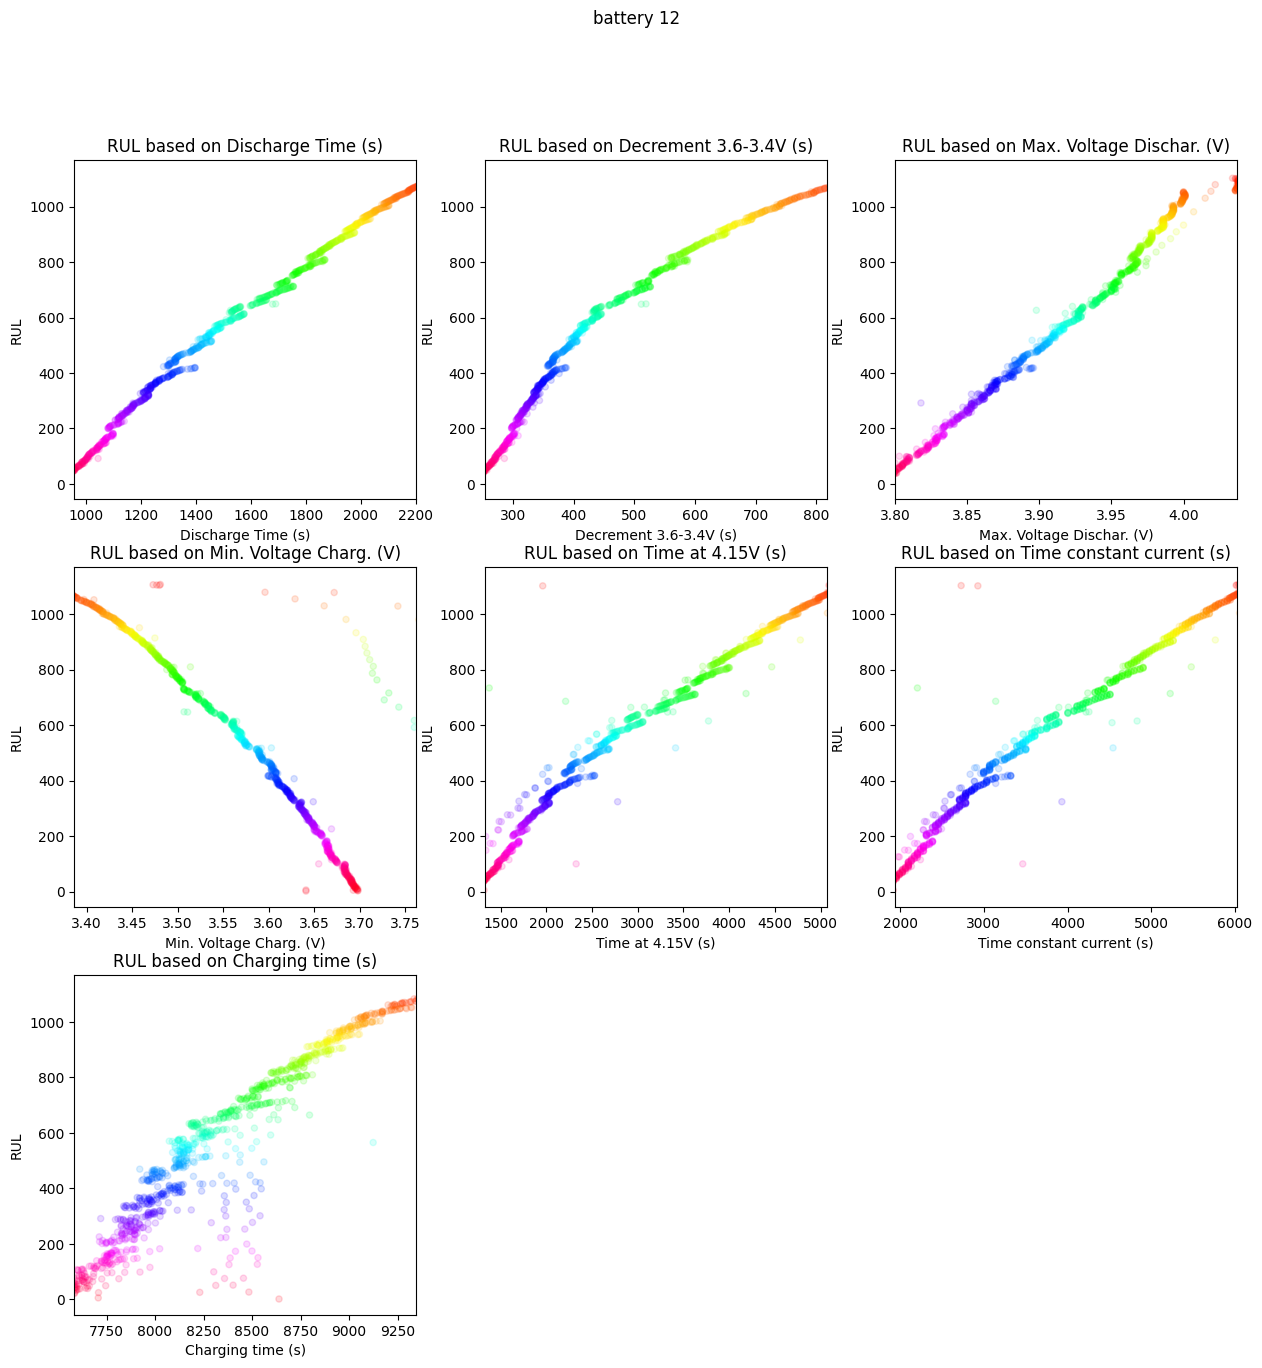

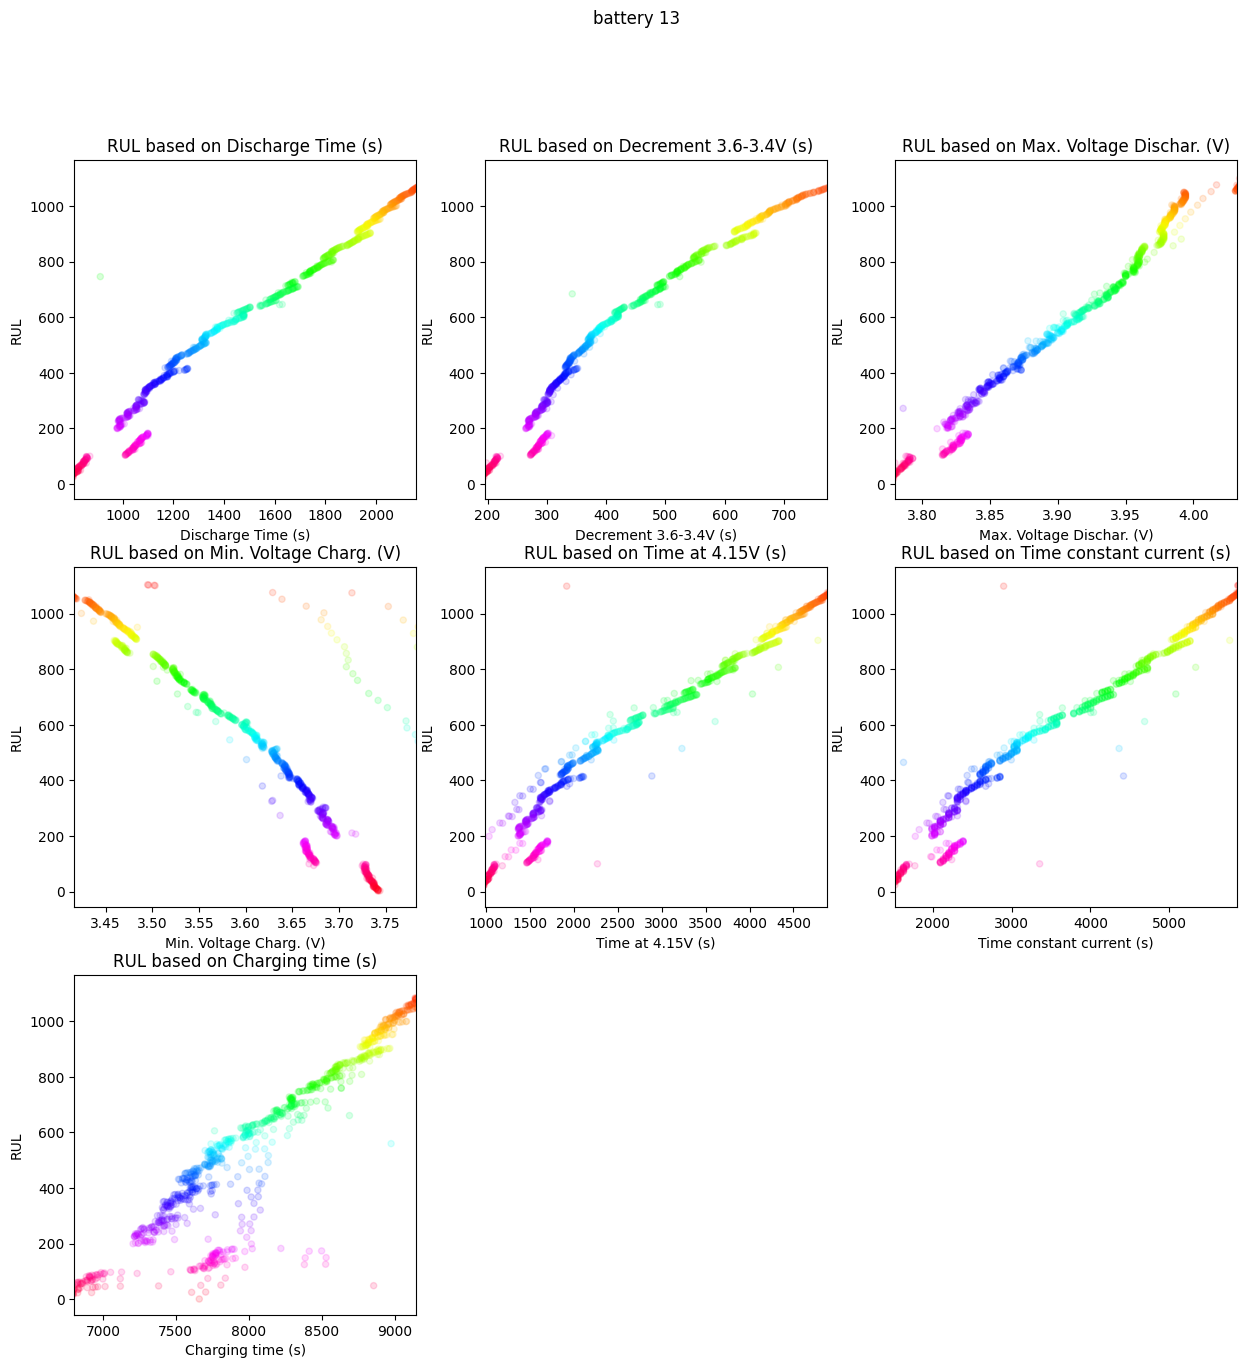

In [3]:
# Determine the layout of the subplots
n_features = len(features_to_plot)
n_cols = 3  # Number of columns in the subplot grid
n_rows = n_features // n_cols + (1 if n_features % n_cols > 0 else 0)  # Calculate rows needed



for bat_i, bat_df in enumerate(dfs):
    # Create figure
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))  # Adjust figsize as needed
    fig.suptitle(f'battery {bat_i}')
    
    # Flatten the axes array for easy iteration if it's 2D
    if n_rows > 1:
        axs = axs.flatten()
        
    for i, feature in enumerate(features_to_plot):    
        title = f"RUL based on {feature}"
        bat_df.plot(
            x=feature,
            y="RUL",
            ax=axs[i],
            title=title,
            kind="scatter",
            alpha=0.15,
            c=bat_df["color"].to_list(),
            xlim=(bat_df[feature].quantile(0.05), bat_df[feature].quantile(0.95))
        )
    
    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].set_visible(False)

    plt.show()

## Plot features over time

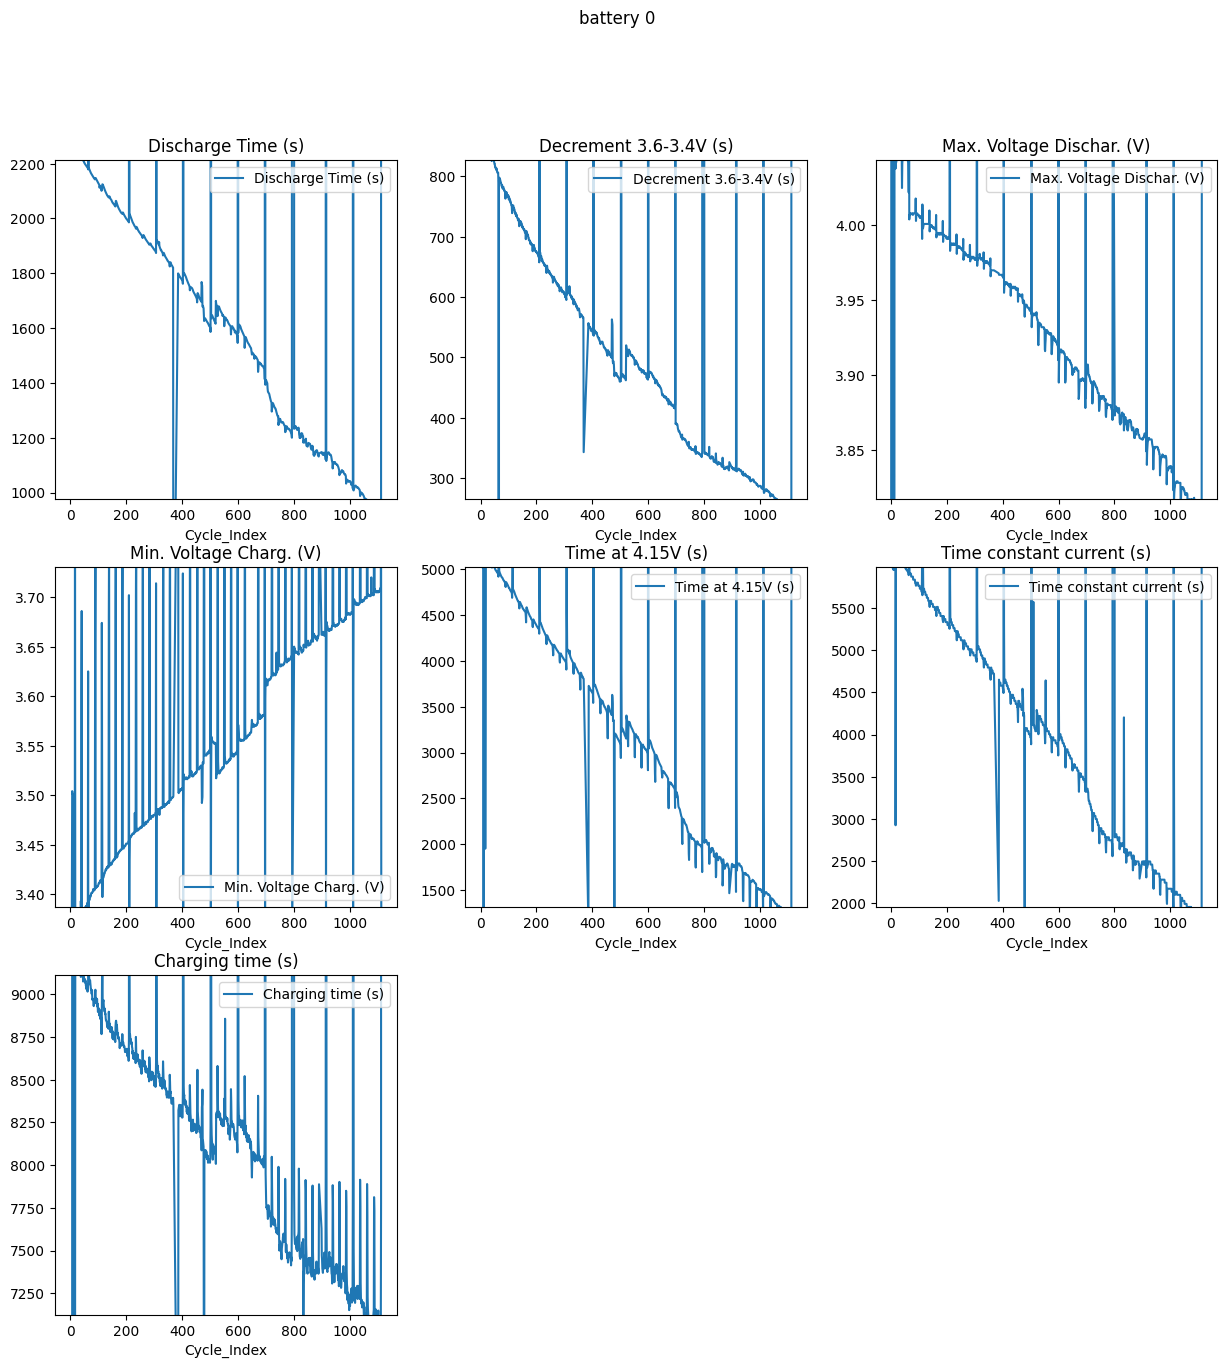

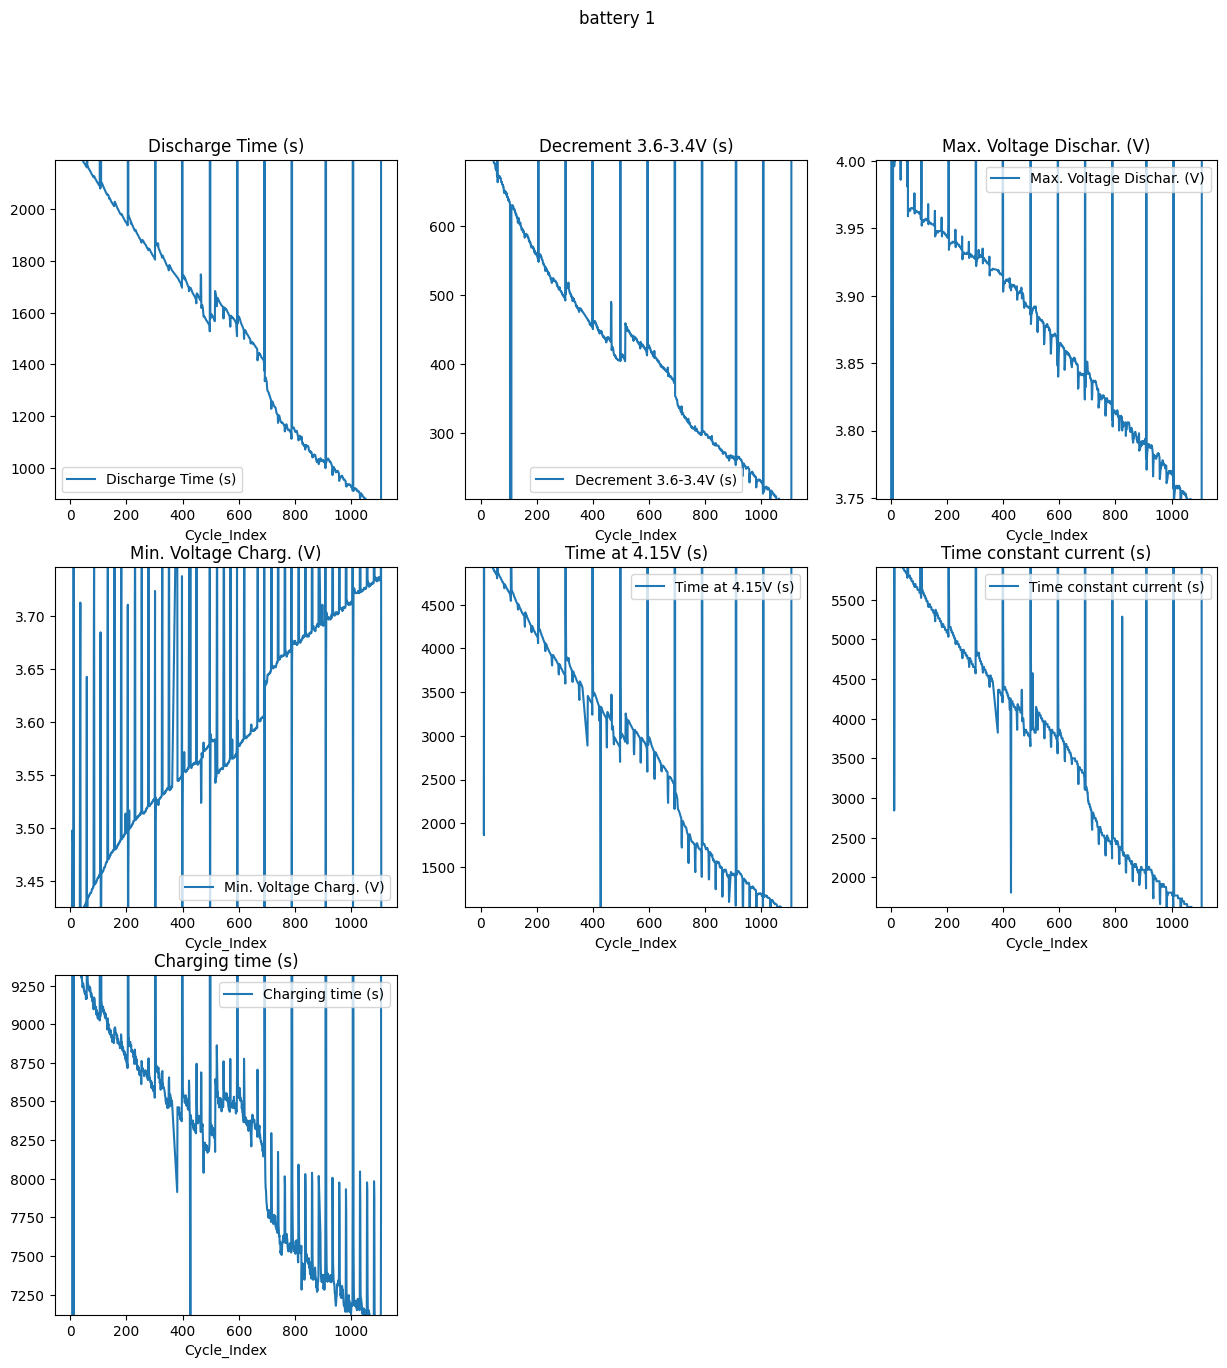

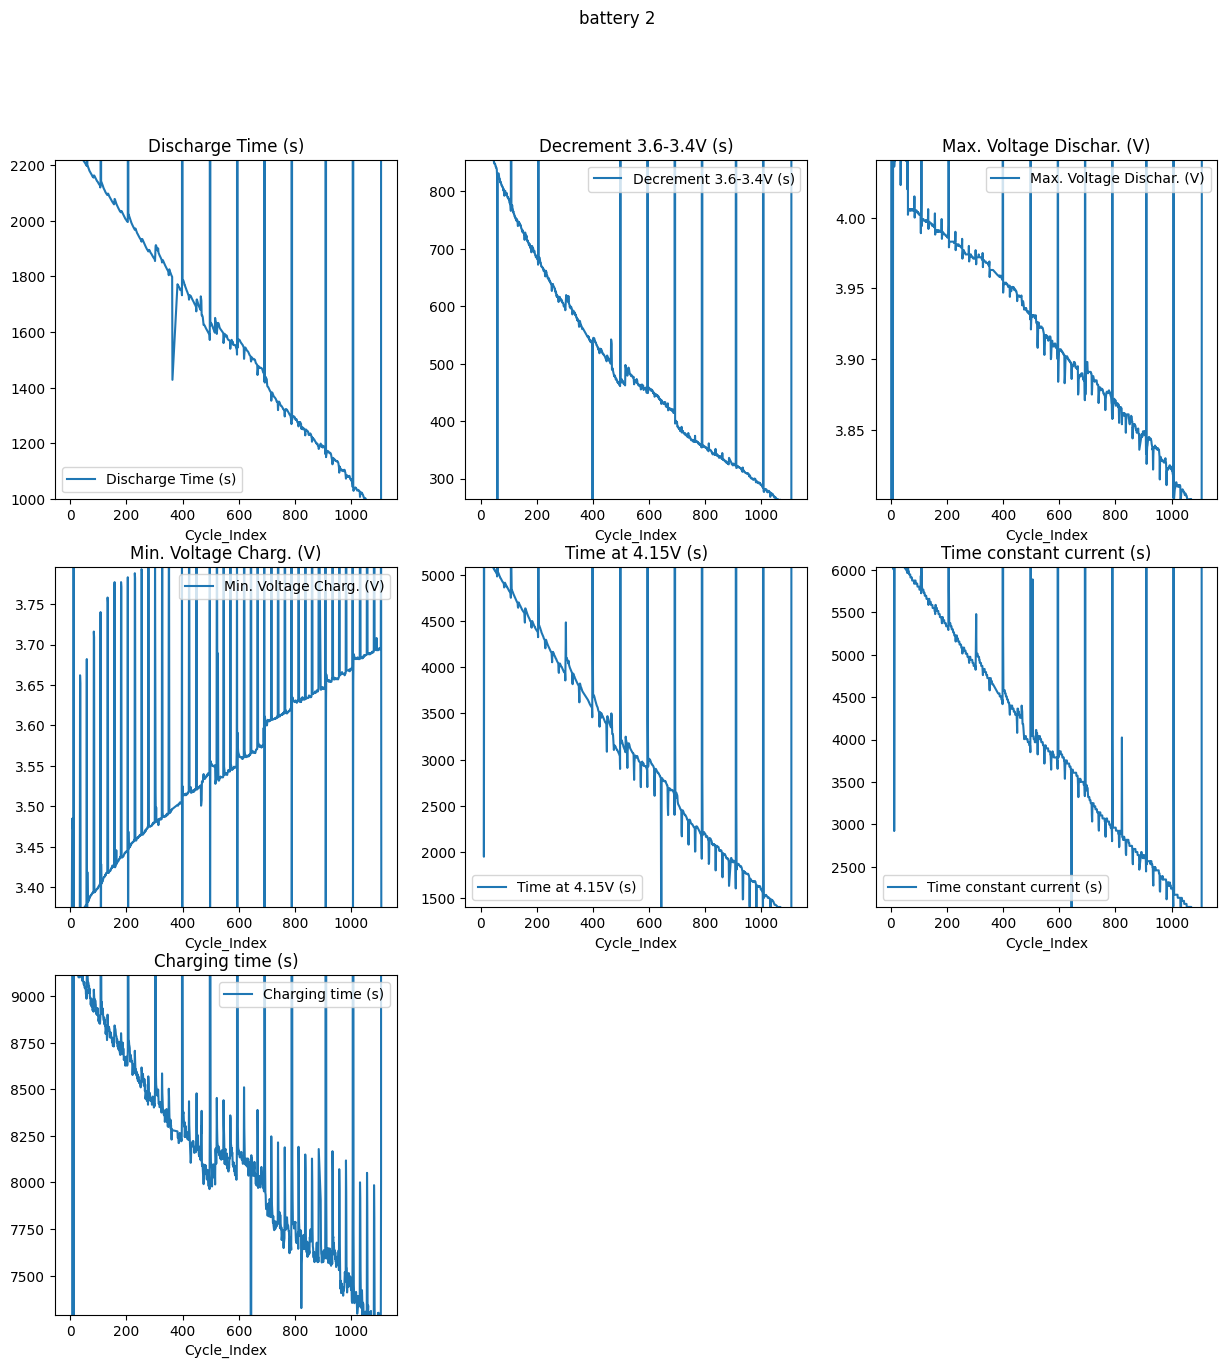

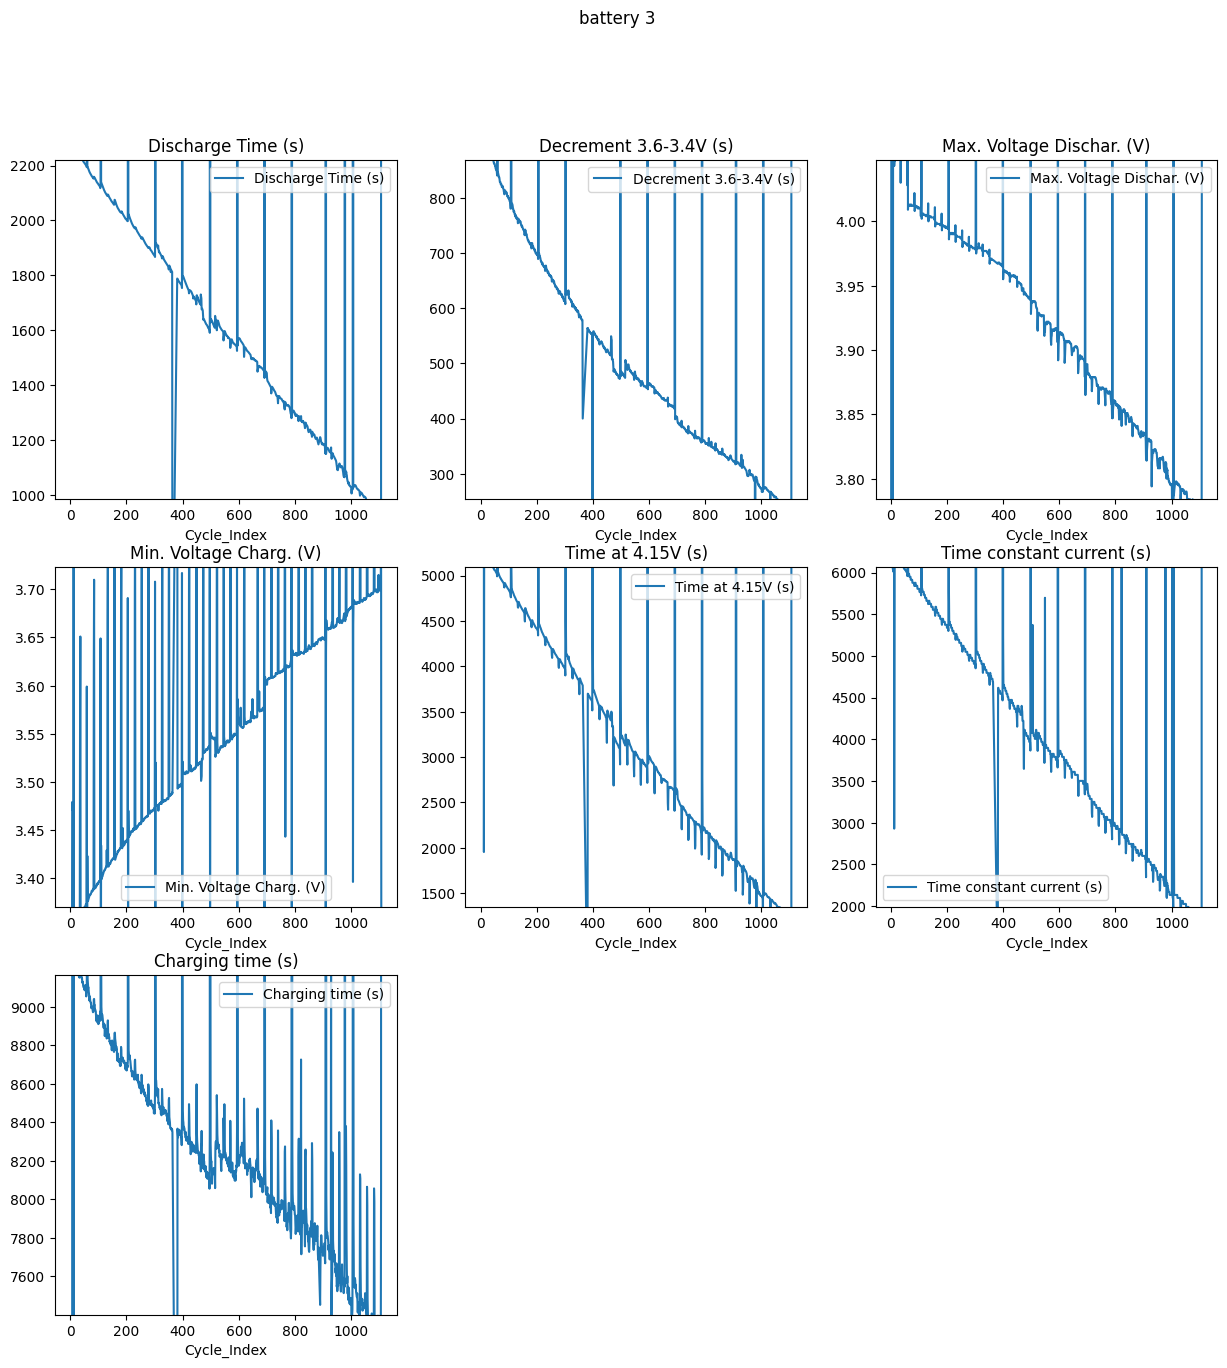

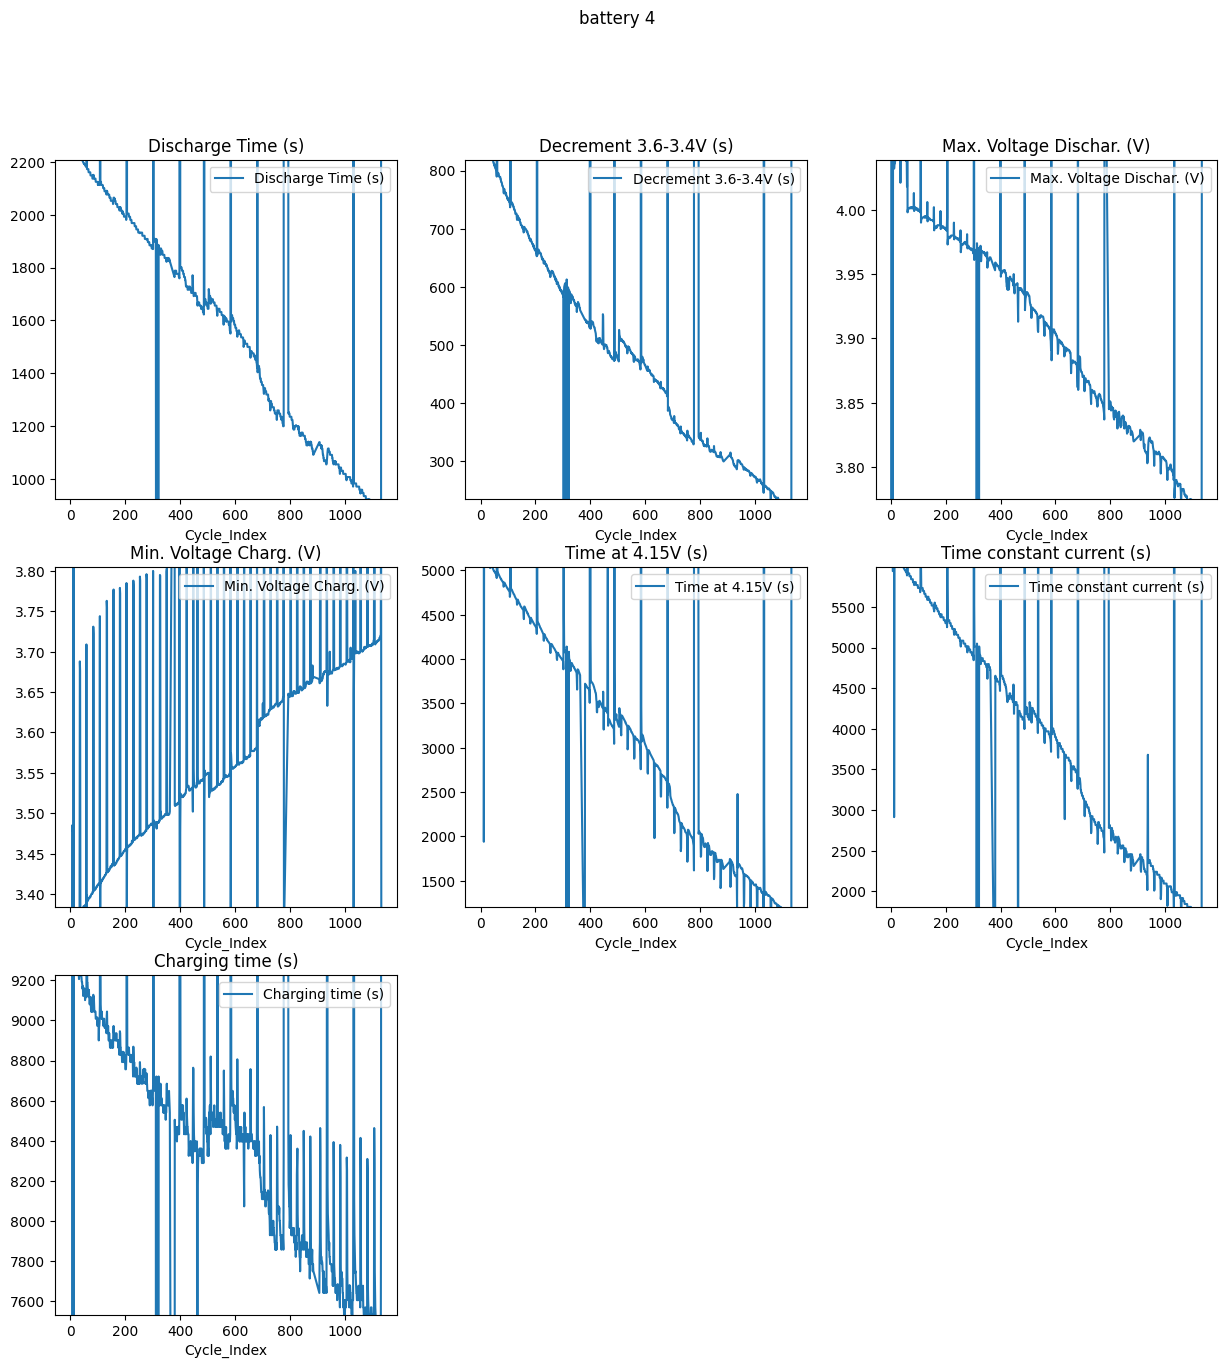

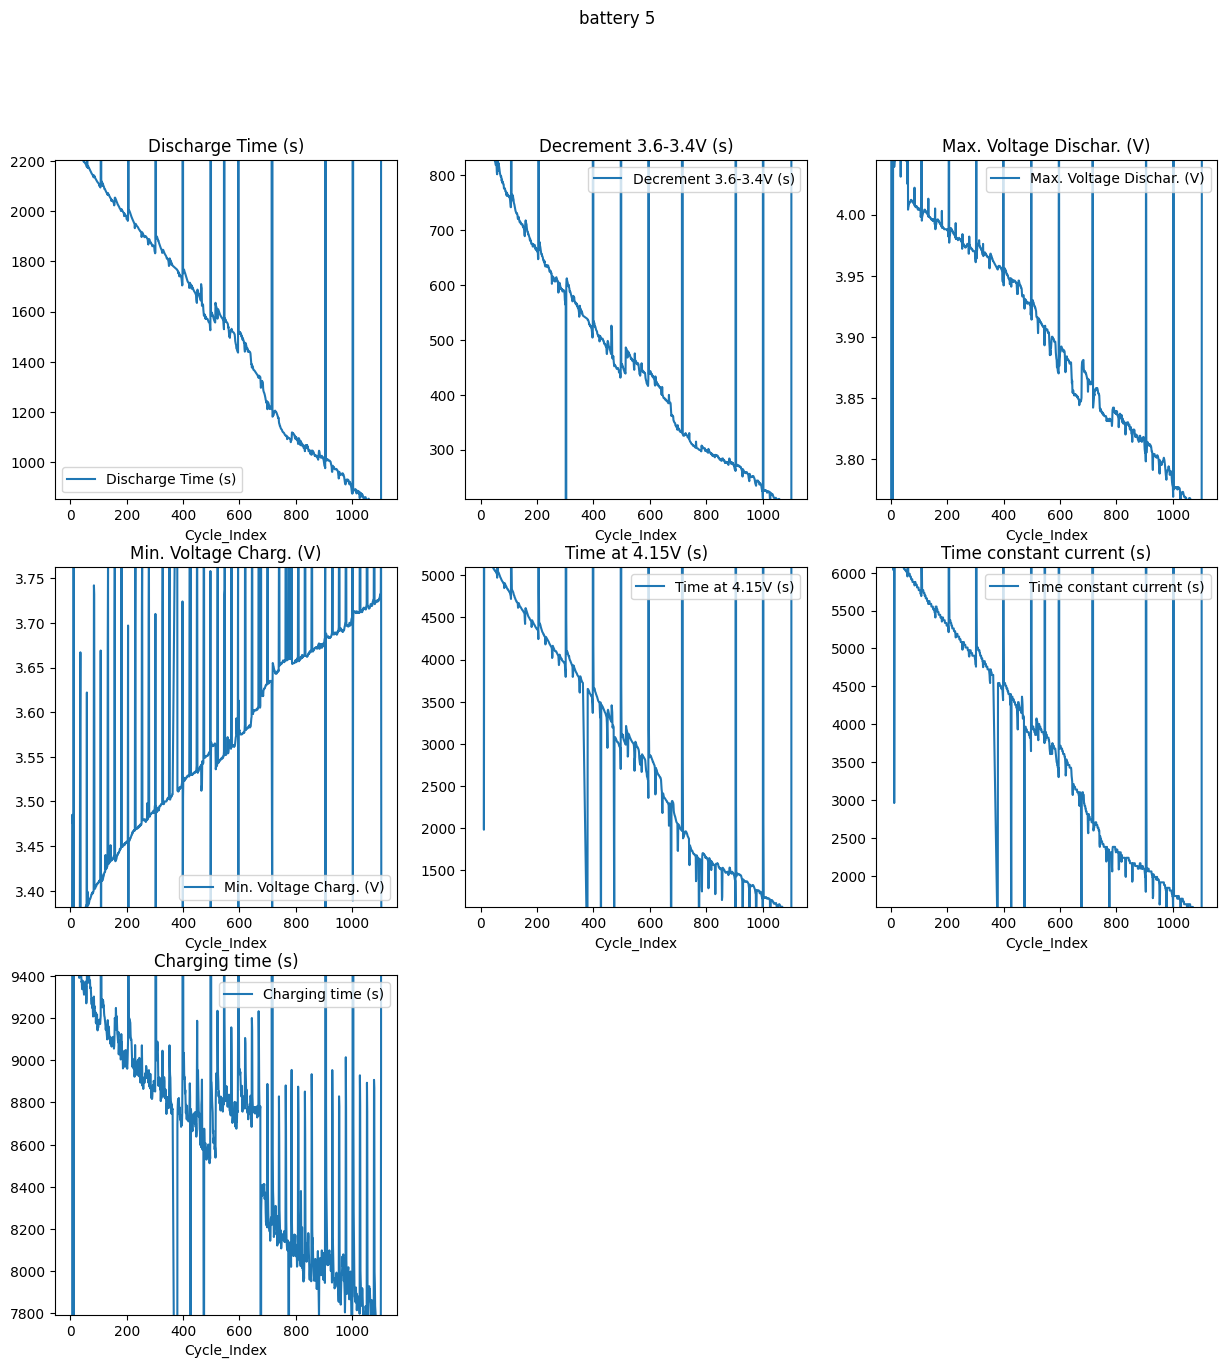

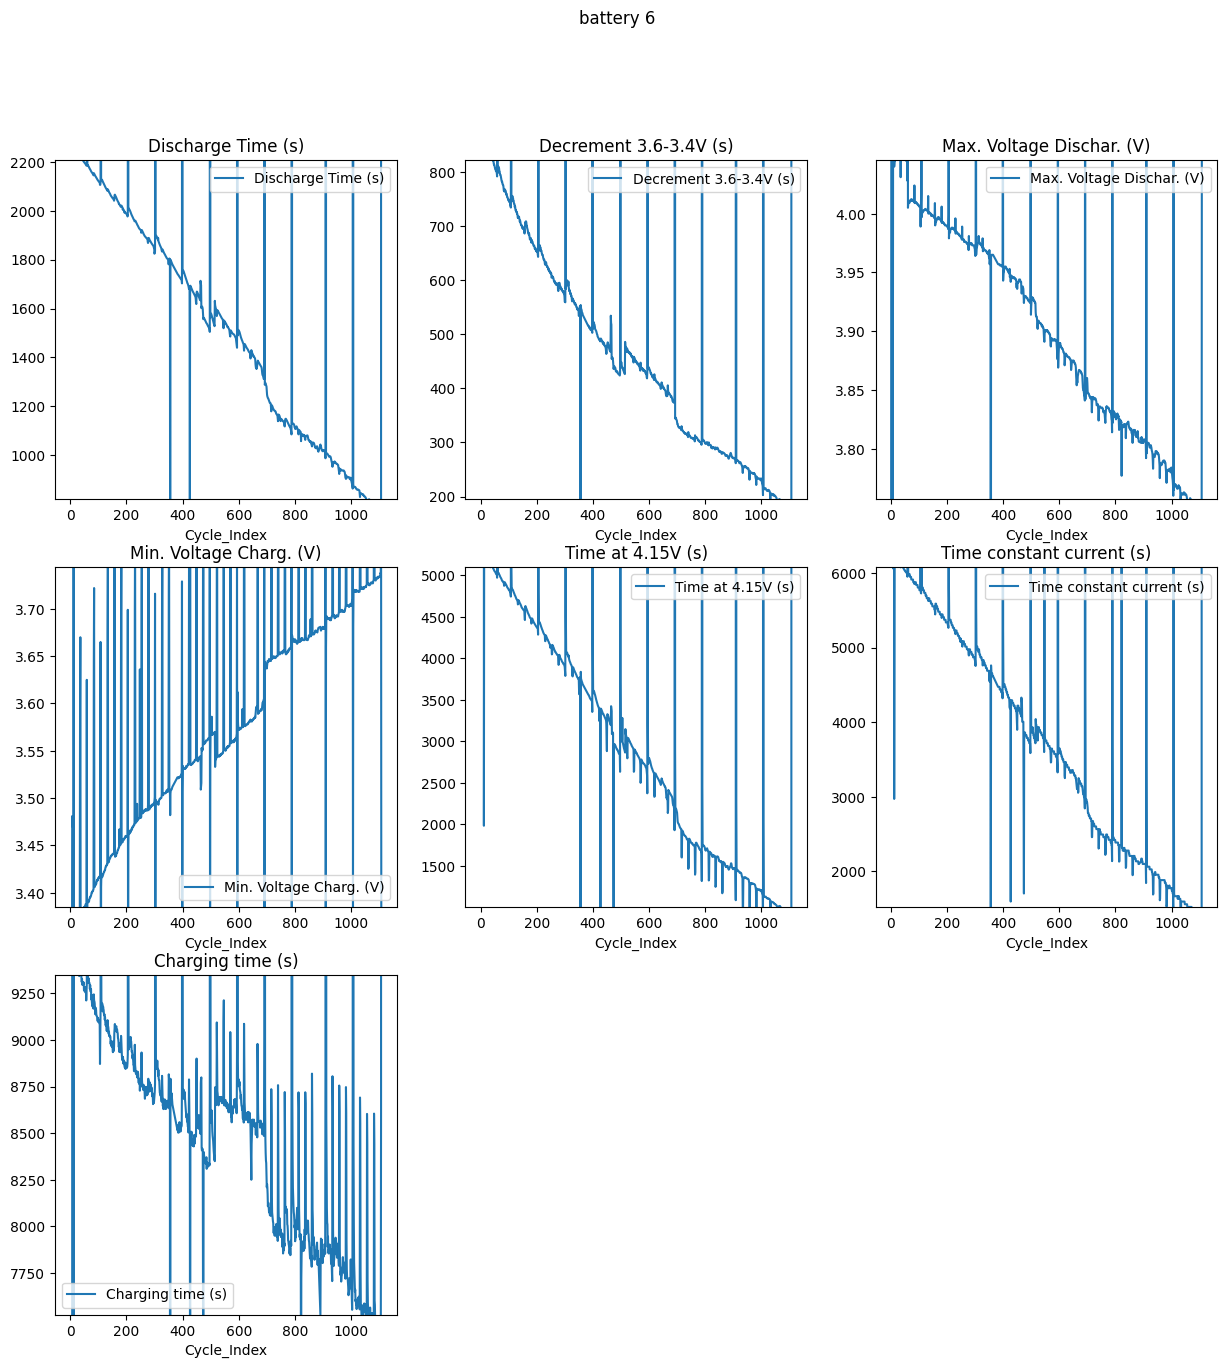

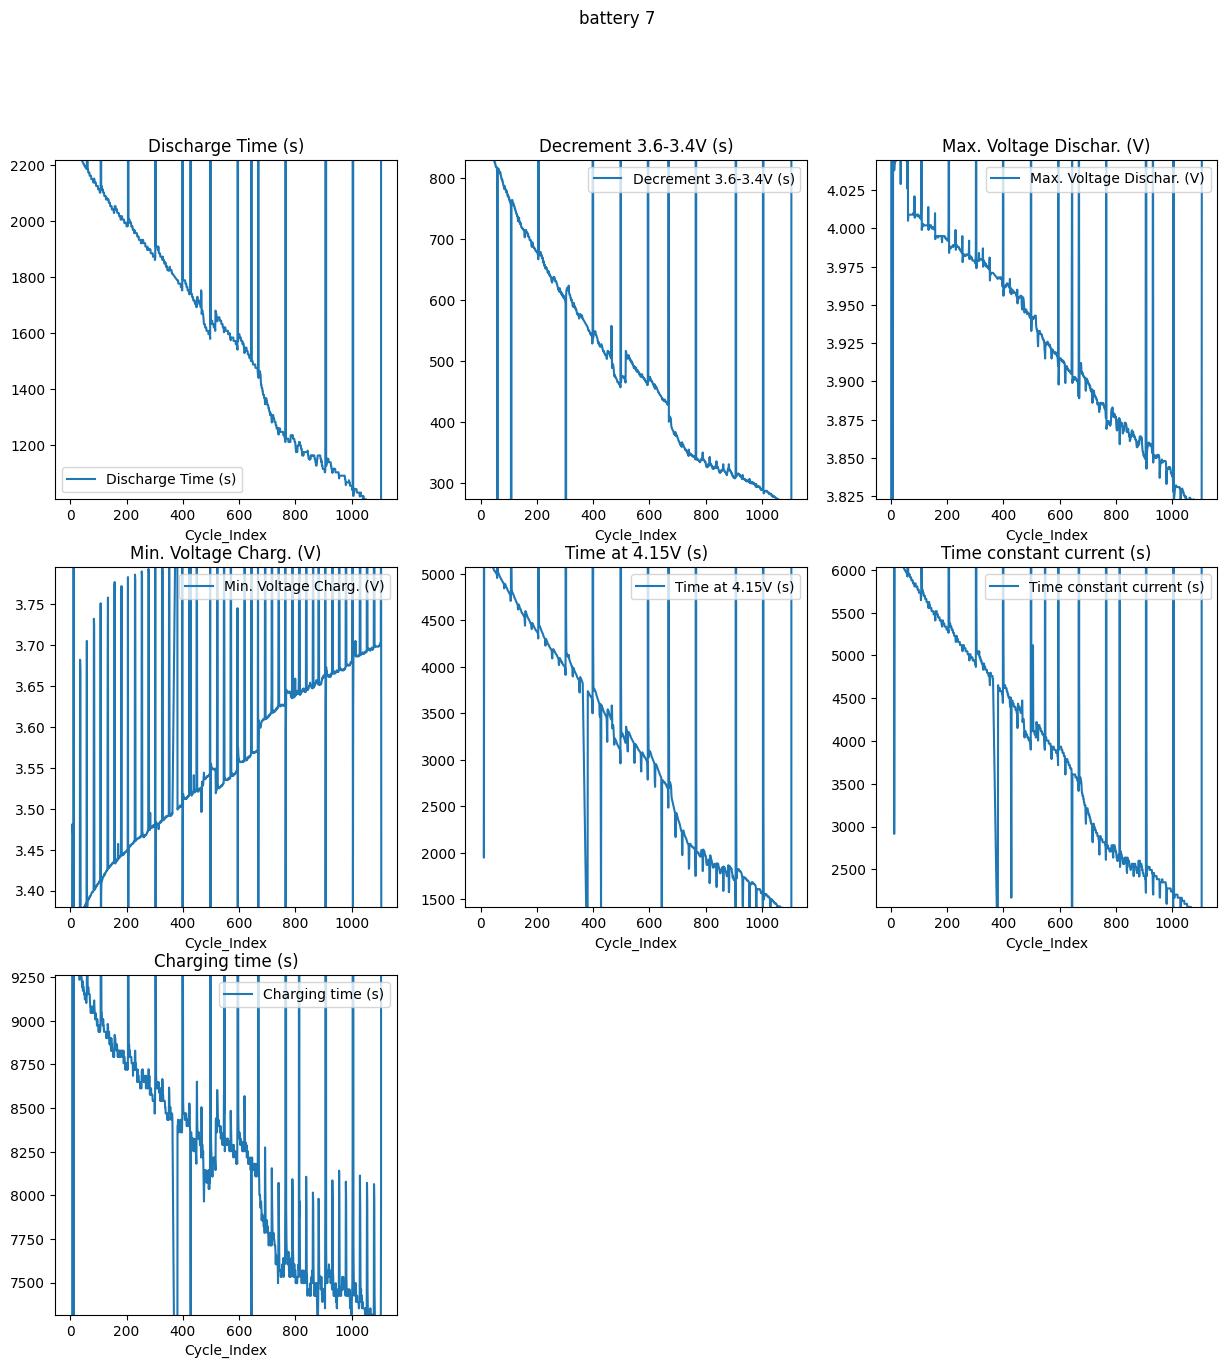

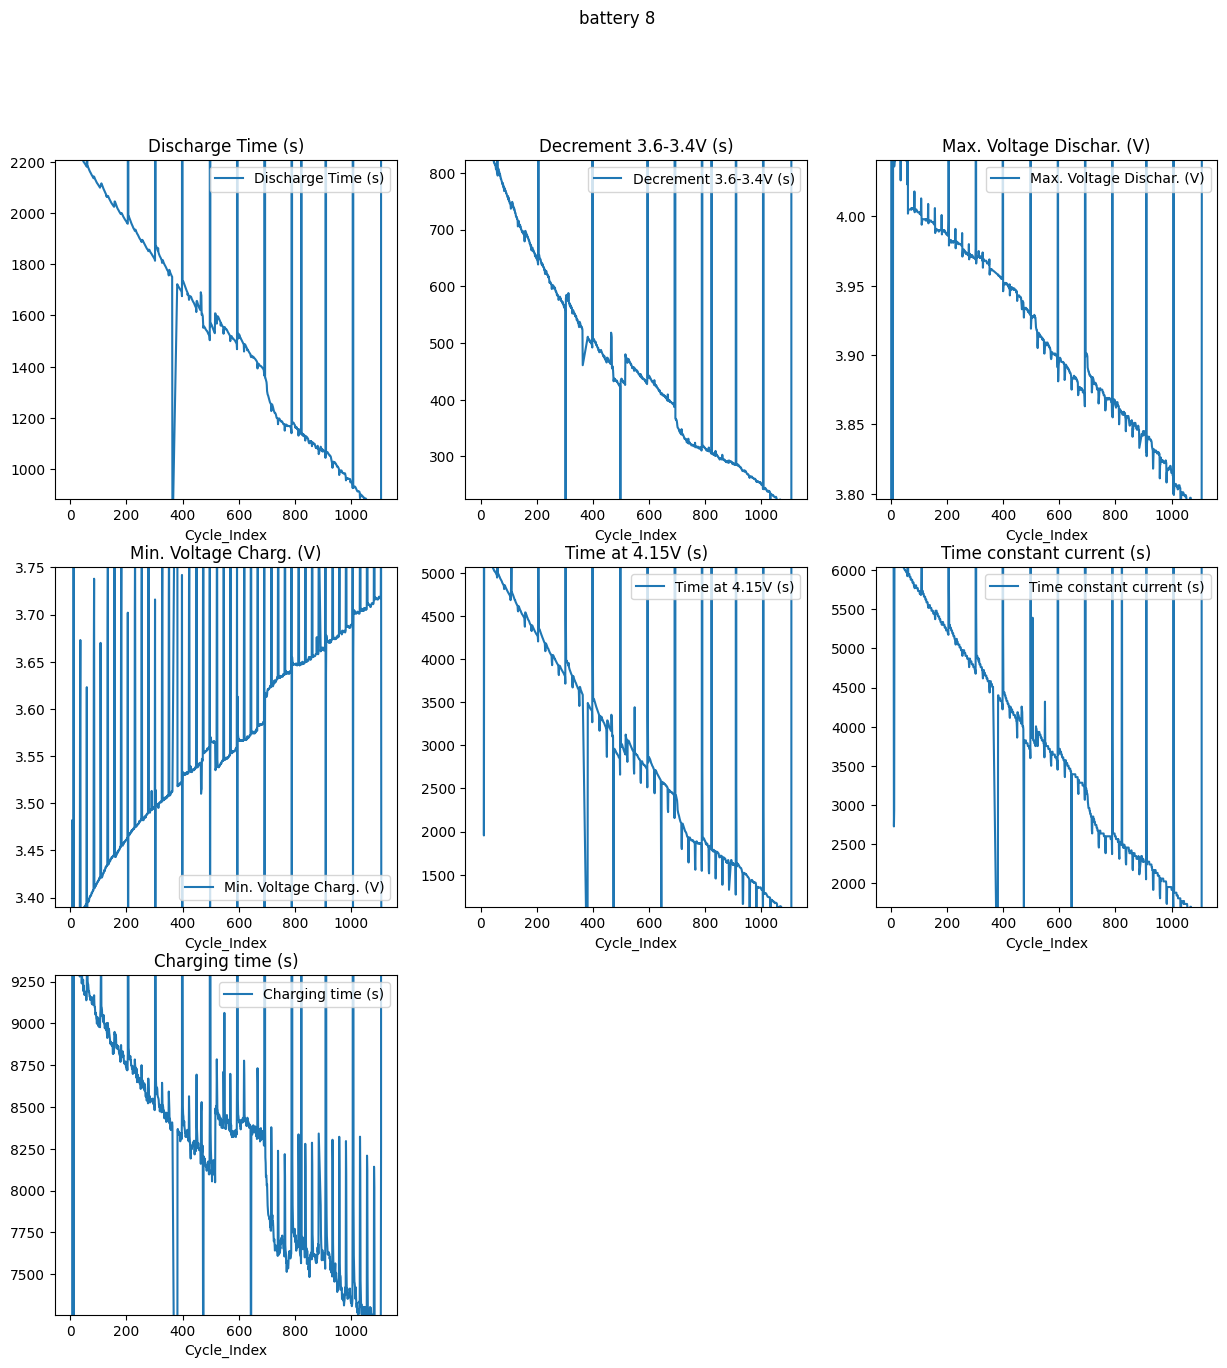

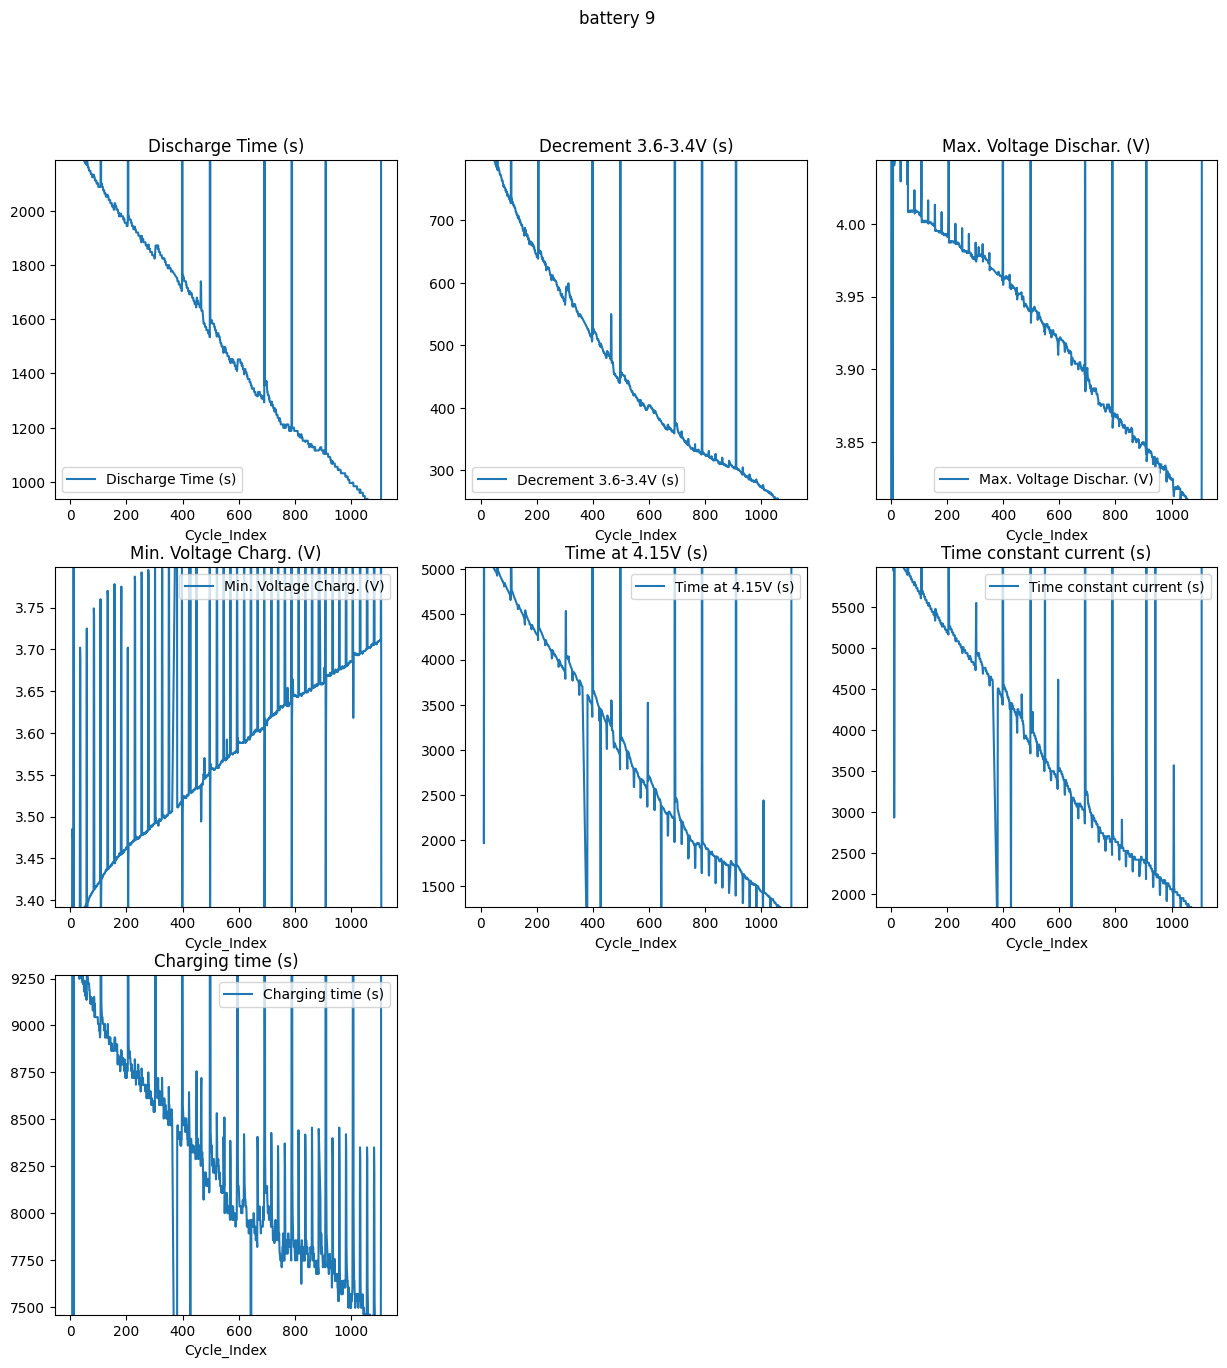

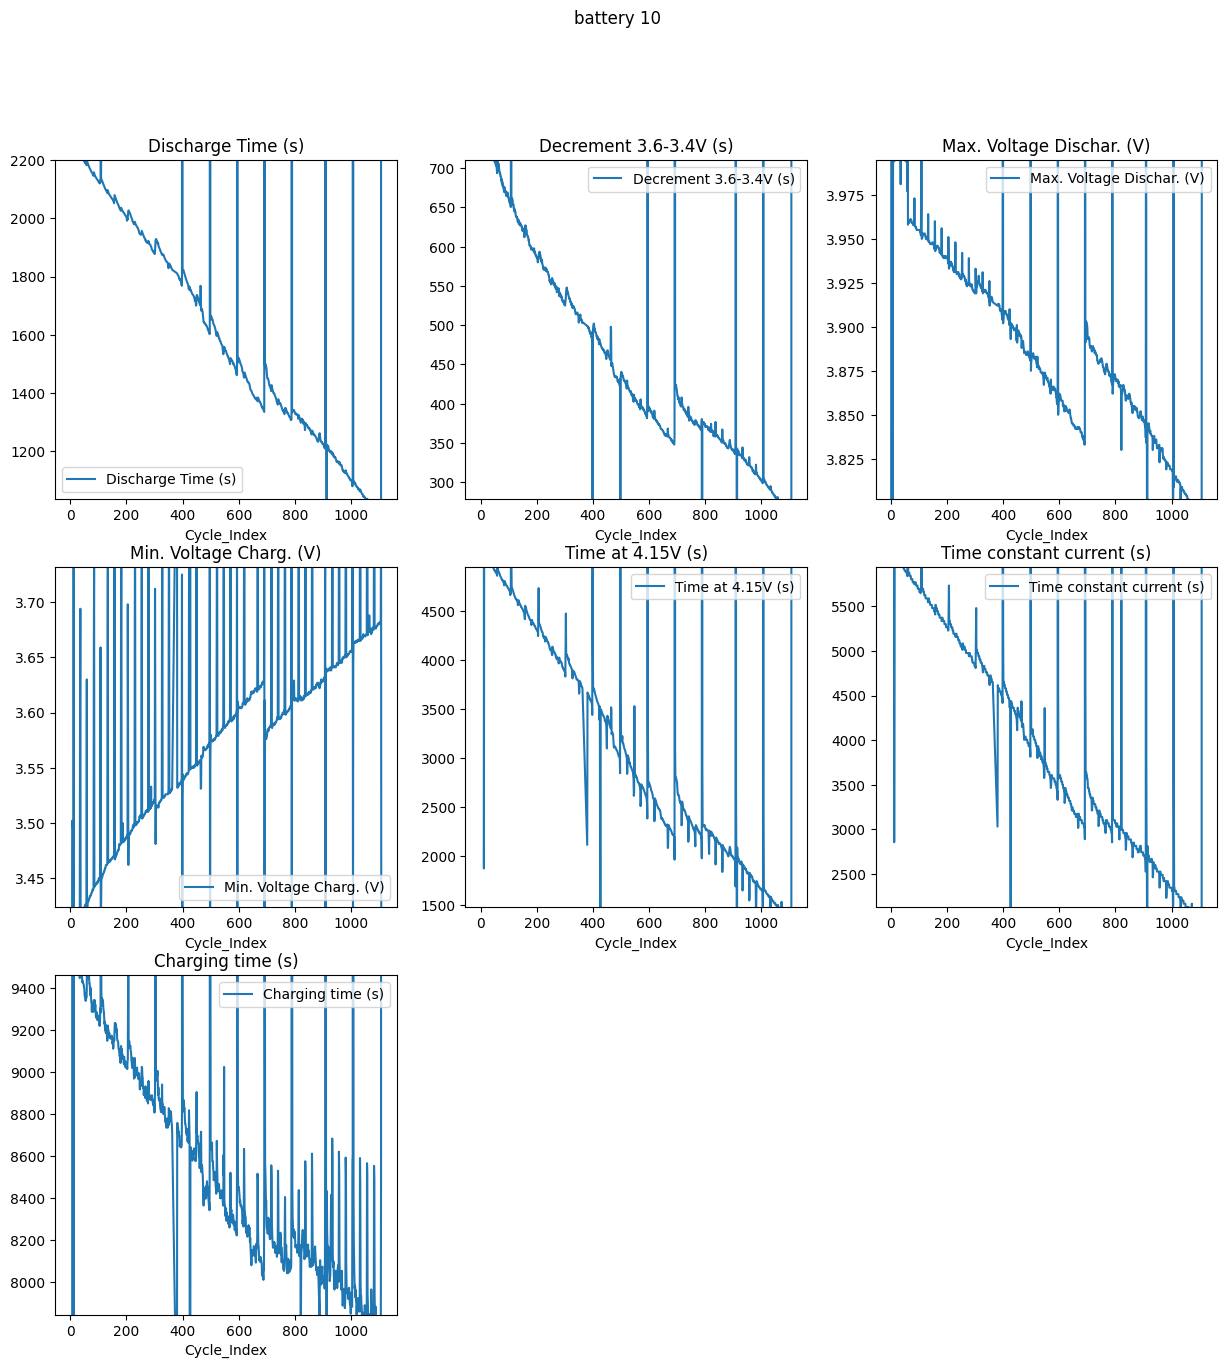

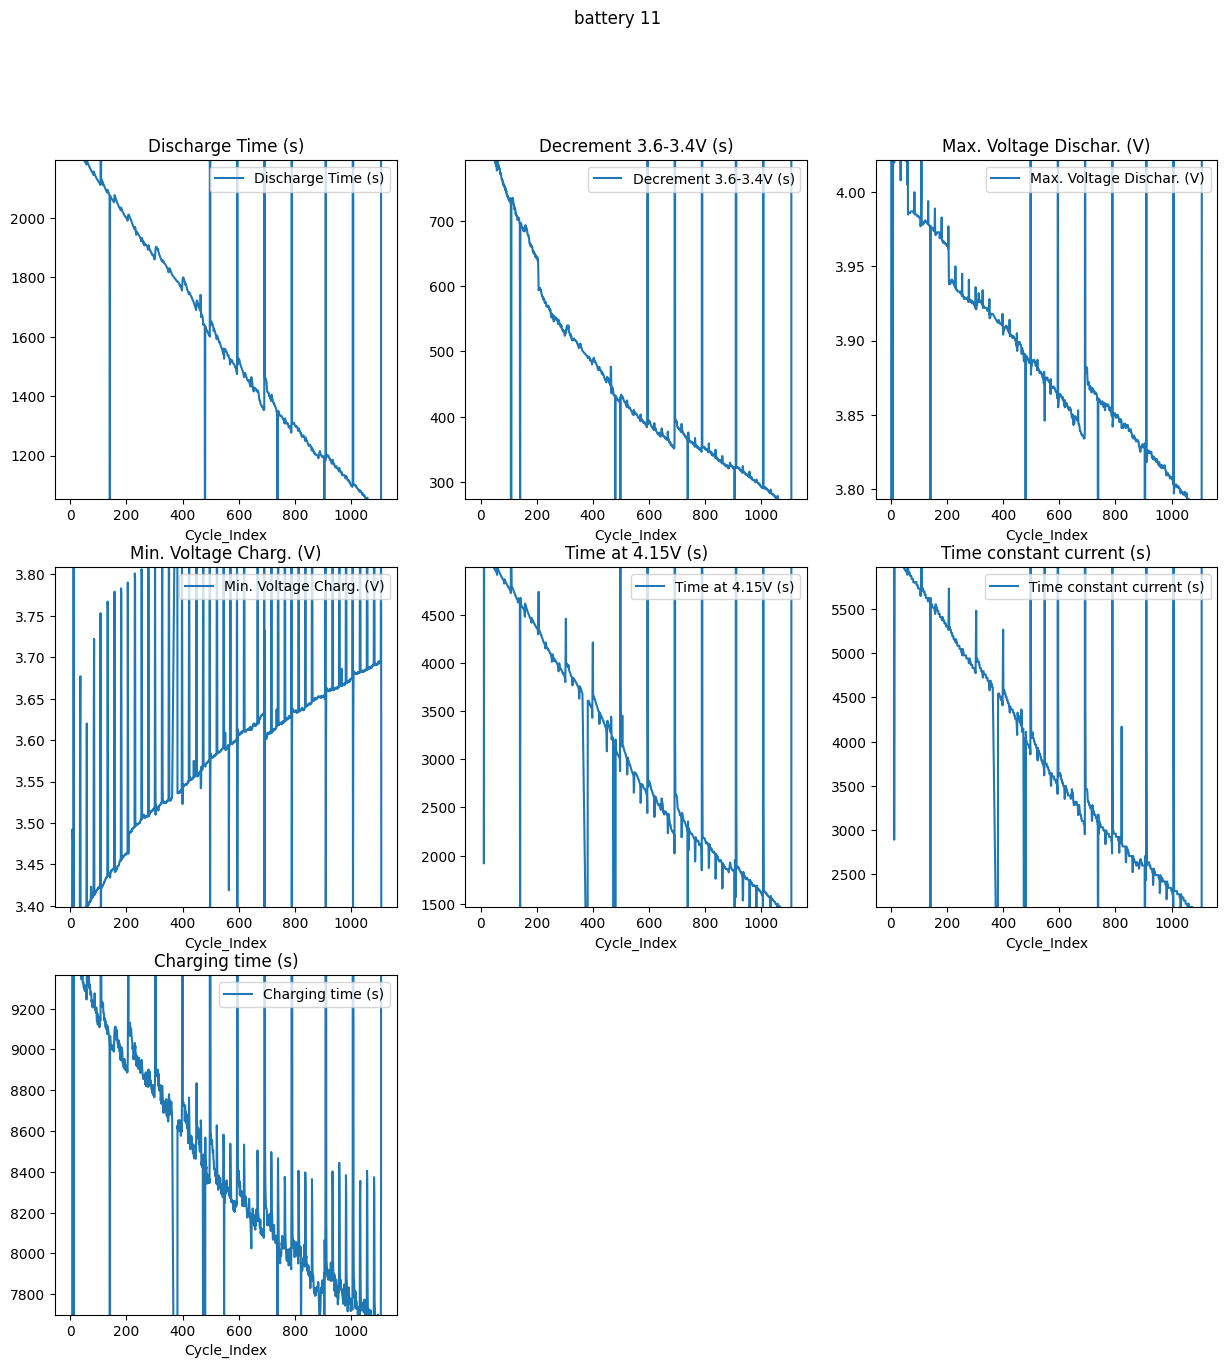

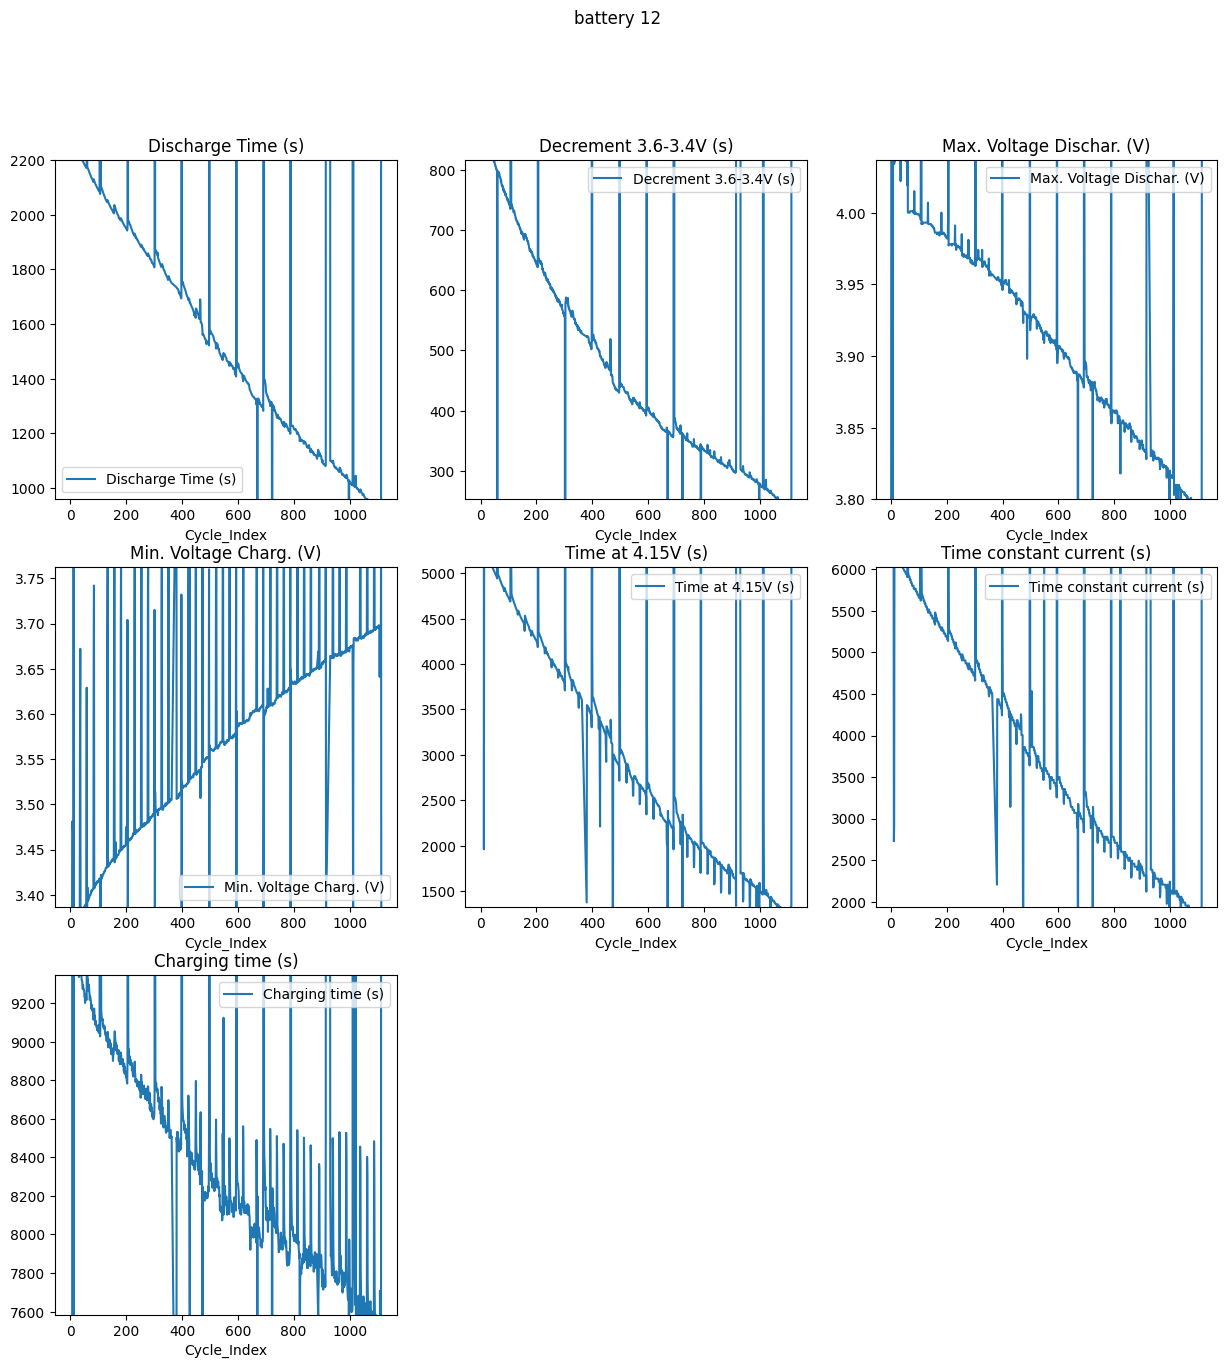

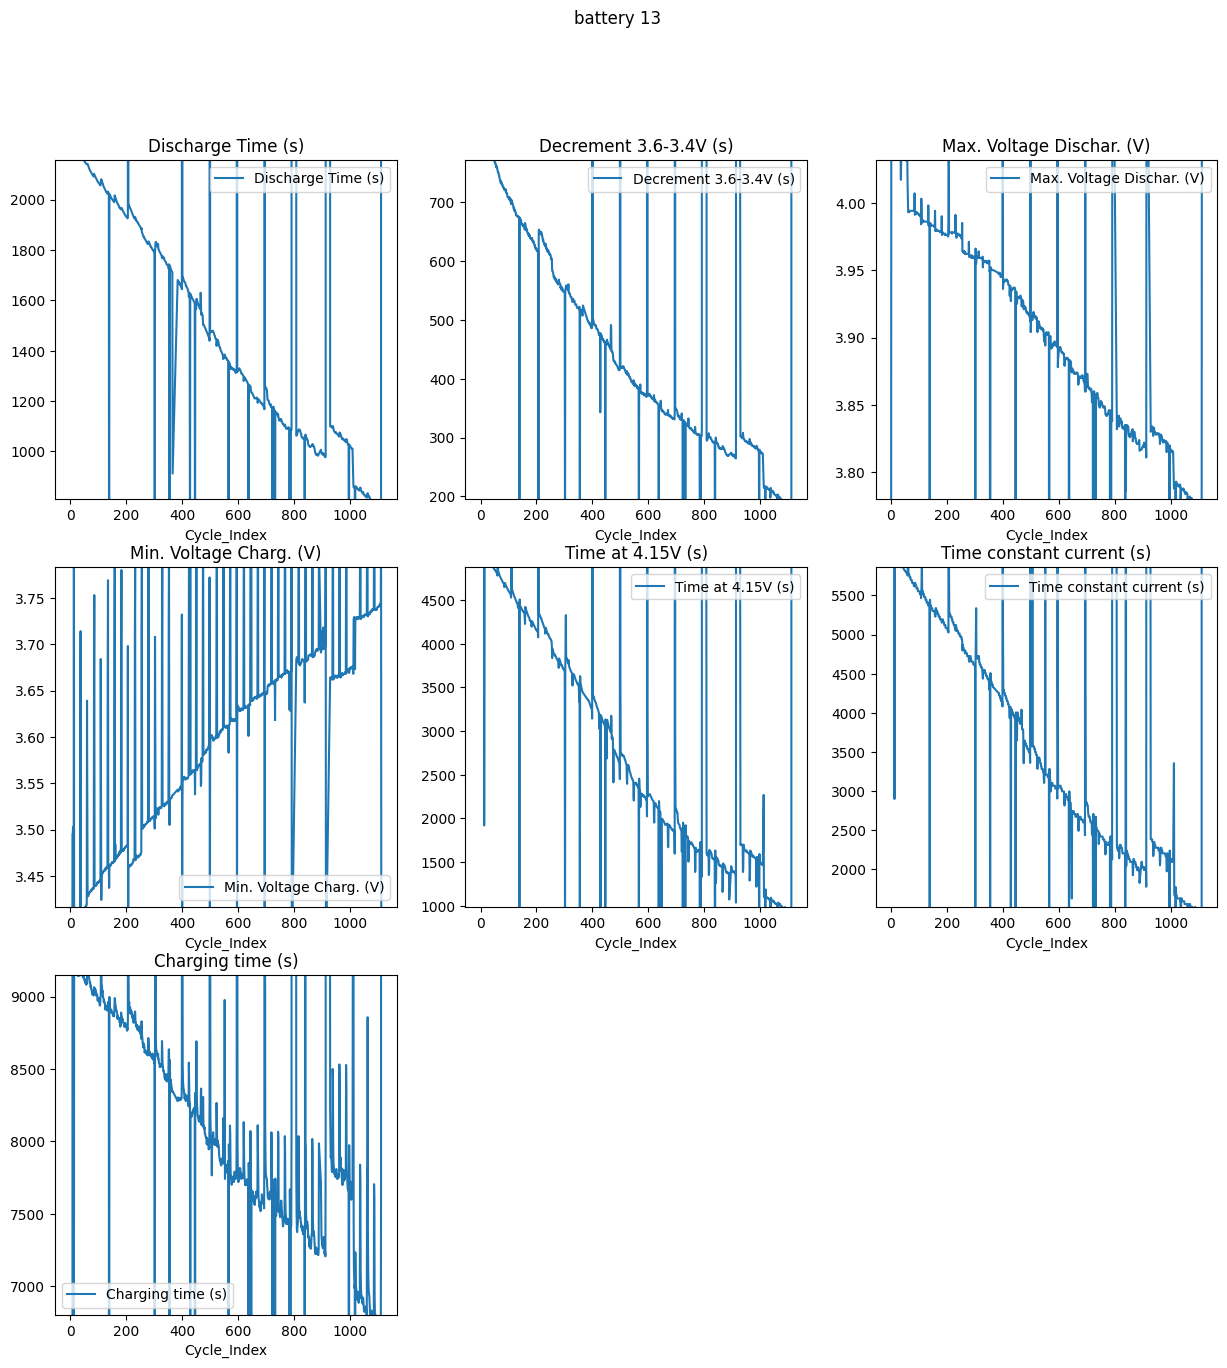

In [4]:
for bat_i, bat_df in enumerate(dfs):
    # Create figure
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))  # Adjust figsize as needed
    fig.suptitle(f'battery {bat_i}')
    
    # Flatten the axes array for easy iteration if it's 2D
    if n_rows > 1:
        axs = axs.flatten()
        
    for i, feature in enumerate(features_to_plot):    
        bat_df.plot(
            #x=feature,
            y=feature,
            ax=axs[i],
            title=feature,
            #kind="scatter",
            #alpha=0.15,
            #c=bat_df["color"].to_list(),
            ylim=(bat_df[feature].quantile(0.05), bat_df[feature].quantile(0.95))
        )
    
    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].set_visible(False)

    plt.show()

## Profile battery dataframe

In [17]:
profiles = [ProfileReport(df.drop("color", axis=1), tsmode=True, title=f"battery {i} EDA", lazy=False) for i, df in enumerate(dfs)]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

## Compare spike seasons

In [ ]:
for bat_i, bat_df in enumerate(dfs):
    # Create figure
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))  # Adjust figsize as needed
    fig.suptitle(f'battery {bat_i}')
    
    # Flatten the axes array for easy iteration if it's 2D
    if n_rows > 1:
        axs = axs.flatten()
        
    for i, feature in enumerate(features_to_plot):    
        bat_df.plot(
            #x=feature,
            y=feature,
            ax=axs[i],
            title=feature,
            #kind="scatter",
            #alpha=0.15,
            #c=bat_df["color"].to_list(),
            ylim=(bat_df[feature].quantile(0.05), bat_df[feature].quantile(0.95))
        )
    
    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].set_visible(False)

    plt.show()

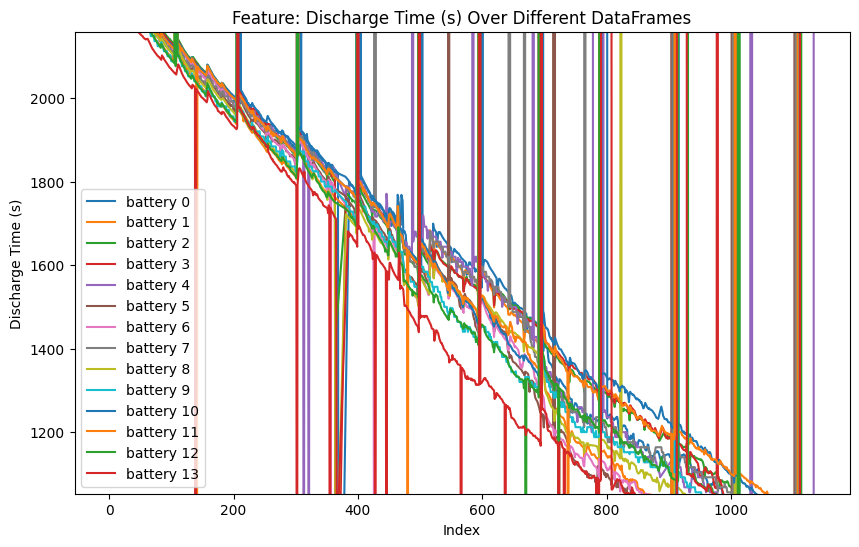

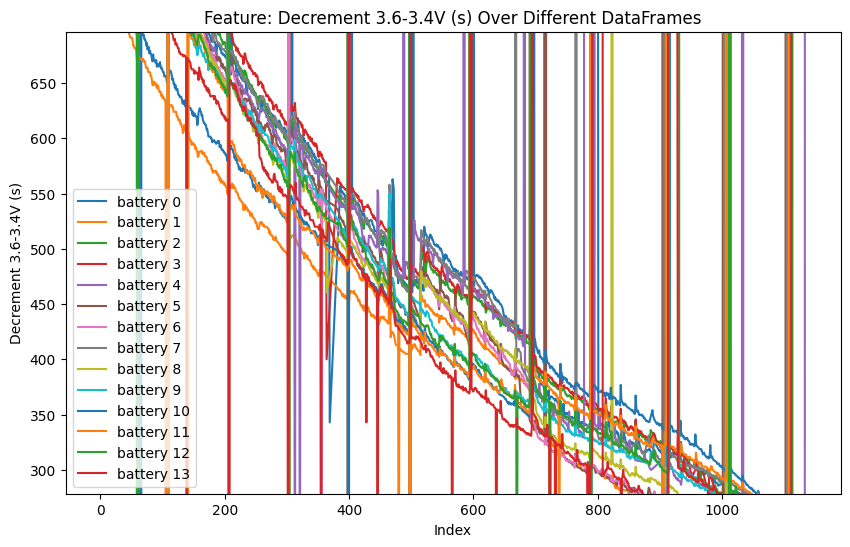

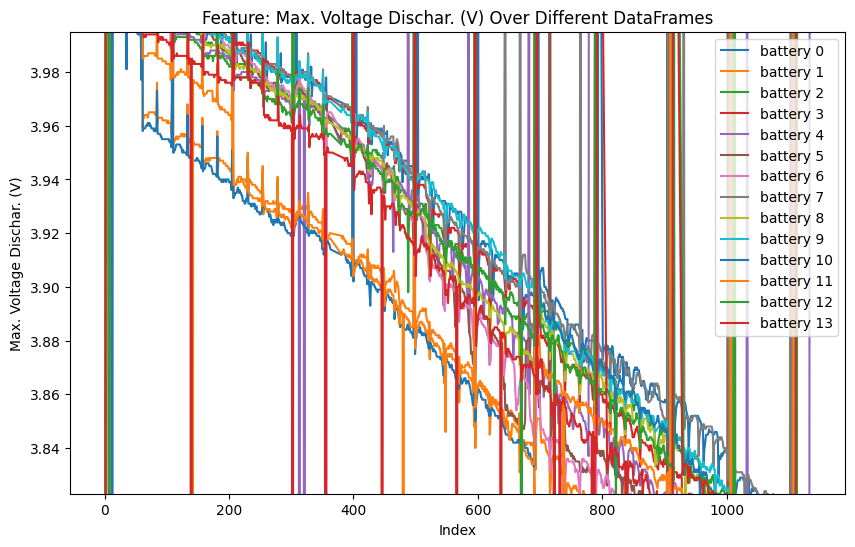

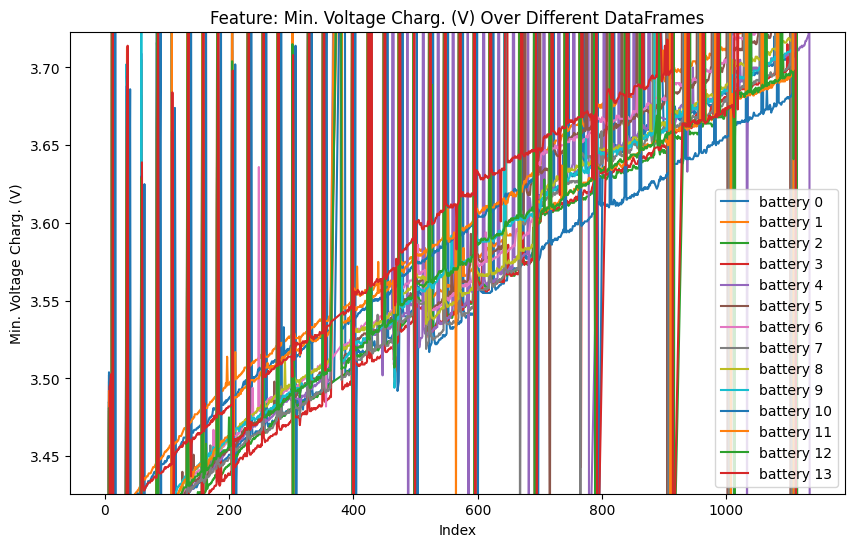

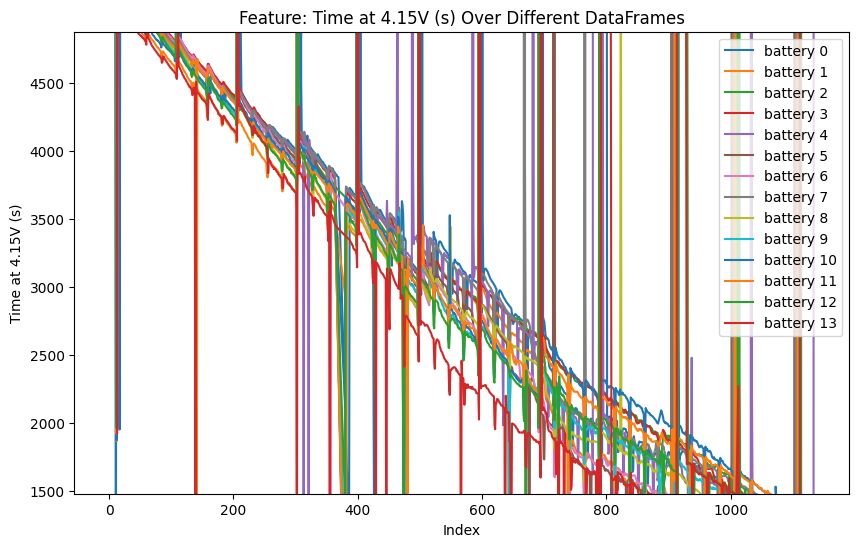

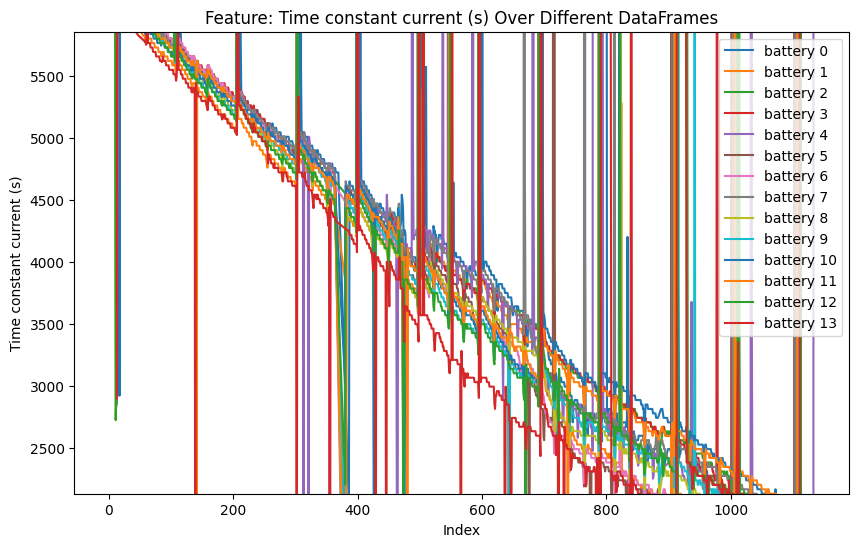

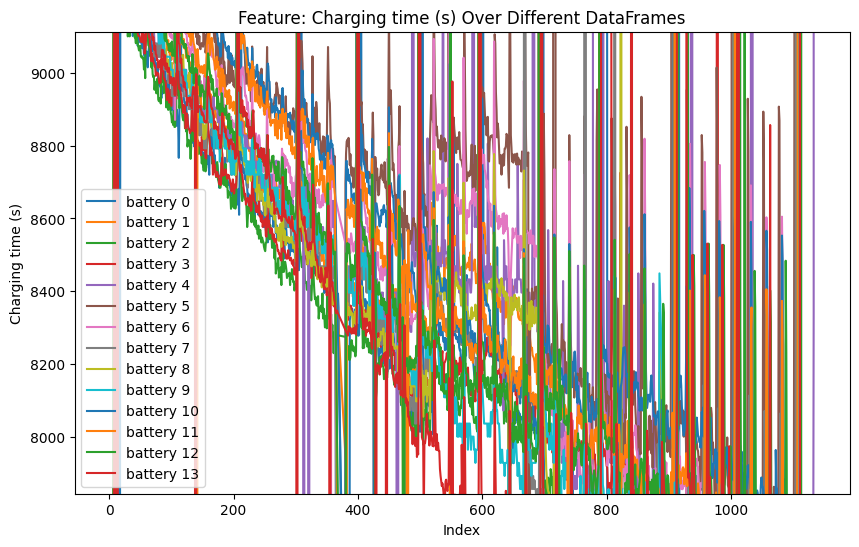

In [35]:
import matplotlib.pyplot as plt

# Example for determining common features (excluding 'RUL' and 'color')
common_features = [col for col in dfs[0].columns if col not in ['RUL', 'color']]

# Now, plot a line graph for each feature
for feature in common_features:
    plt.figure(figsize=(10, 6))  # Create a new figure for each feature
    x_min = -4000
    x_max = 1e6
    for i, bat_df in enumerate(dfs):
        # Plotting each DataFrame as a separate line
        series = bat_df[feature]
        x_min = max(x_min, series.quantile(0.05))
        x_max = min(x_max, series.quantile(0.95))
        plt.plot(series, label=f'battery {i}')
    plt.ylim((x_min, x_max))
    plt.title(f'Feature: {feature} Over Different DataFrames')
    plt.xlabel('Index')  # Assuming index is meaningful, adjust as necessary
    plt.ylabel(feature)
    plt.legend()
    plt.show()
